# Step 1: Environment Setup for Google Colab
# This code prepares all necessary libraries and loads the data

In [2]:
# Install required packages (run once in Colab)
!pip install -q pandas numpy matplotlib seaborn scipy scikit-learn

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Environment setup complete!")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

Environment setup complete!
pandas version: 2.2.2
numpy version: 2.0.2
scikit-learn version: 1.6.1


# Load the McDonald's fast food data from CSV
# Upload your CSV file to Colab first

In [5]:
from google.colab import files
uploaded = files.upload()  # Upload "mcdonalds.csv" file

# Read the data
file_name = list(uploaded.keys())[0] # Get the name of the first uploaded file
mcdonalds = pd.read_csv(file_name)

# Display basic information
print("Dataset loaded successfully!")
print(f"\nDataset shape: {mcdonalds.shape}")
print(f"Number of consumers: {mcdonalds.shape[0]}")
print(f"Number of variables: {mcdonalds.shape[1]}")

# Display first few rows
print("\nFirst 5 rows of data:")
print(mcdonalds.head())

# Display column names
print("\nColumn names:")
print(mcdonalds.columns.tolist())

# Display data types
print("\nData types:")
print(mcdonalds.dtypes)

Saving Updated worksheet case study mc donalds - Sheet1.csv to Updated worksheet case study mc donalds - Sheet1.csv
Dataset loaded successfully!

Dataset shape: (1431, 16)
Number of consumers: 1431
Number of variables: 16

First 5 rows of data:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Ratings  Age      VisitFrequency  Gender  
0         No   -3       -3   61  Every three months  Female  
1         No   +2        2   51  Every three months  Female  
2         No   +1        1   62  Every three months  Female  
3        Yes   +4        4

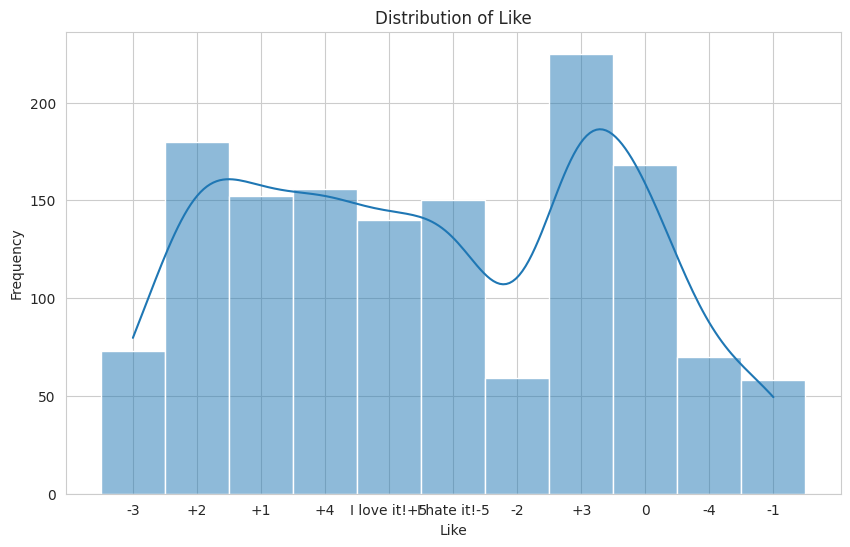

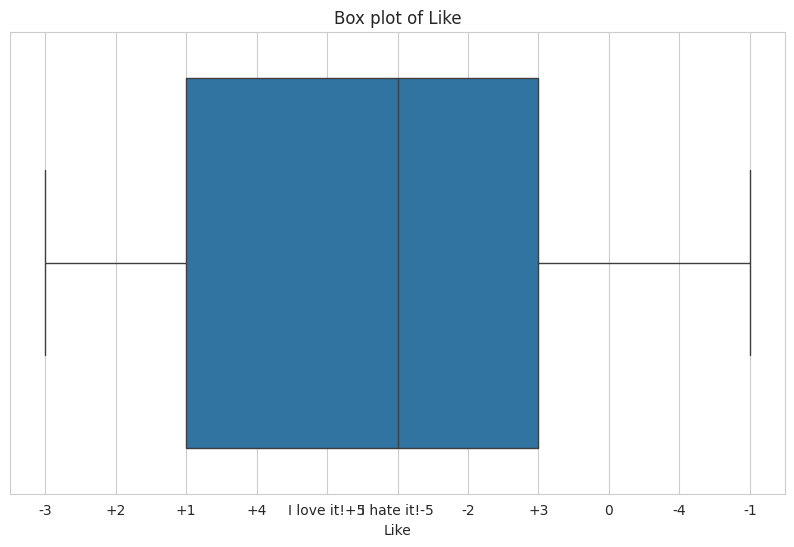

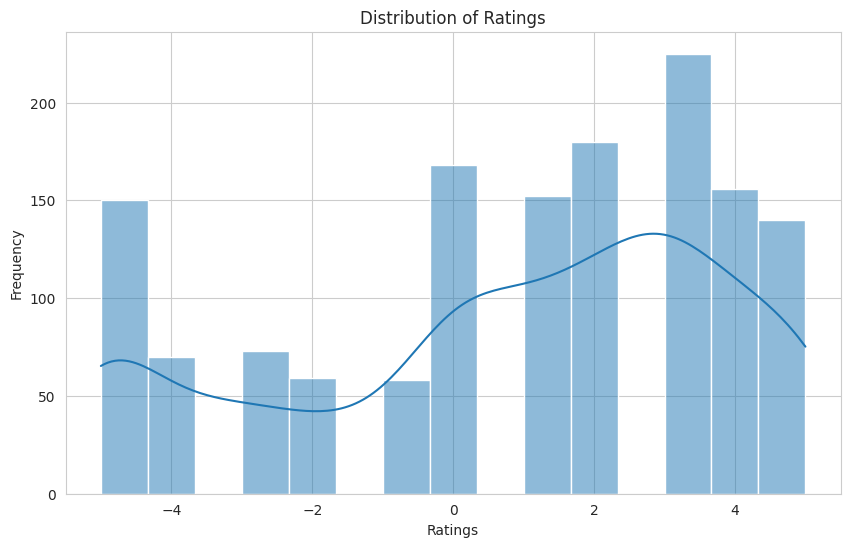

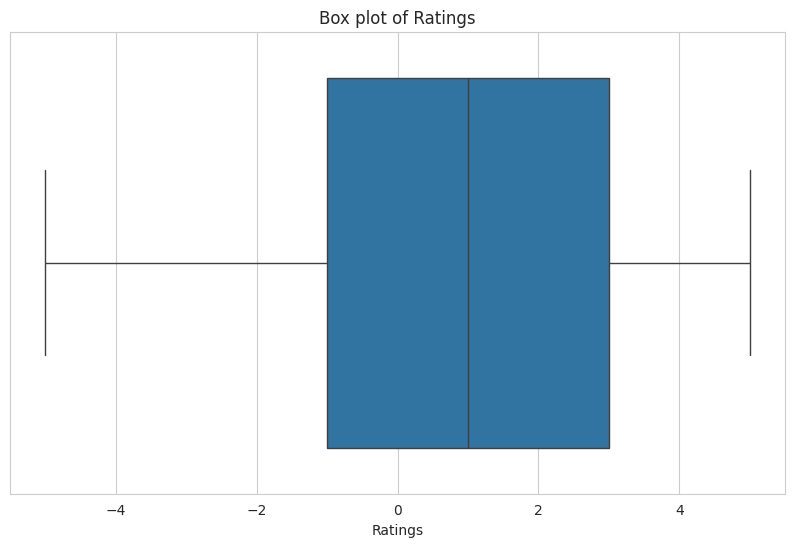

In [6]:
numerical_cols_to_visualize = ['Like', 'Ratings']

for col in numerical_cols_to_visualize:
    # Plot Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=mcdonalds, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Plot Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=mcdonalds, x=col)
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

# Task
Explore the distribution of variables in the dataframe.

## Identify variable types

### Subtask:
Identify which columns in the `mcdonalds` DataFrame are categorical and which are numerical.


**Reasoning**:
Display the data types of the columns in the `mcdonalds` DataFrame to identify which columns are categorical and which are numerical.



In [7]:
print(mcdonalds.dtypes)

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Ratings            int64
Age                int64
VisitFrequency    object
Gender            object
dtype: object


**Reasoning**:
Based on the displayed data types, identify and list the categorical and numerical columns in the `mcdonalds` DataFrame. Columns with 'object' dtype are typically categorical, and 'int64' dtype are numerical.



In [8]:
categorical_cols = mcdonalds.select_dtypes(include='object').columns.tolist()
numerical_cols = mcdonalds.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)

Categorical columns:
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']

Numerical columns:
['Ratings', 'Age']


## Explore categorical variables

### Subtask:
For categorical variables, generate frequency tables and visualize the distributions using bar plots.


**Reasoning**:
Iterate through categorical columns, print frequency tables and plot bar charts to visualize distributions.




Frequency table for: yummy
yummy
Yes    786
No     645
Name: count, dtype: int64


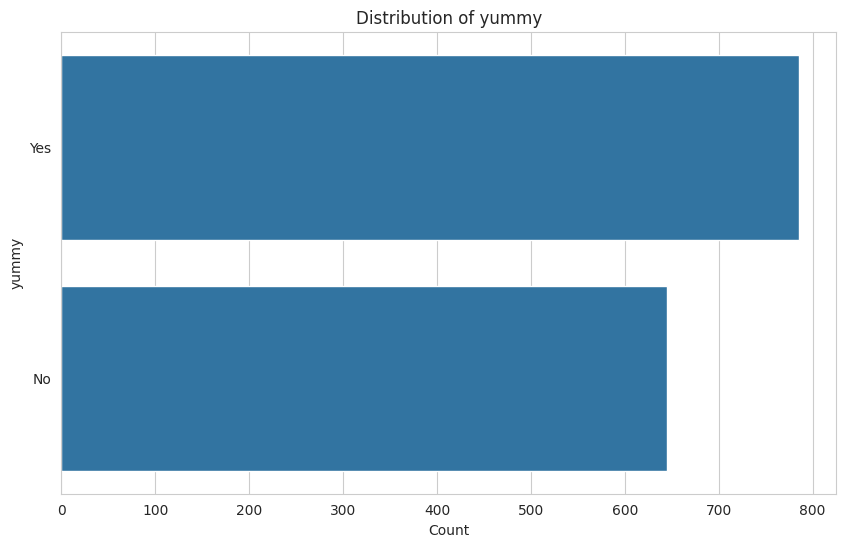


Frequency table for: convenient
convenient
Yes    1298
No      133
Name: count, dtype: int64


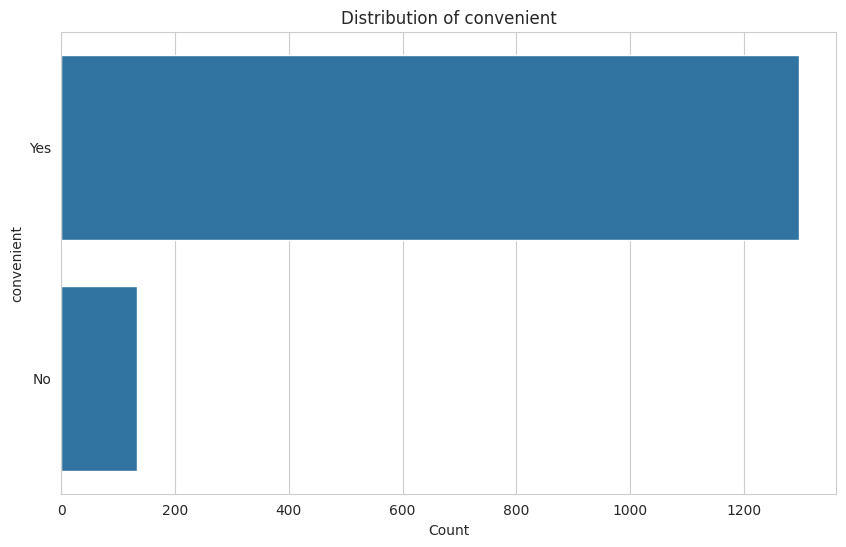


Frequency table for: spicy
spicy
No     1295
Yes     136
Name: count, dtype: int64


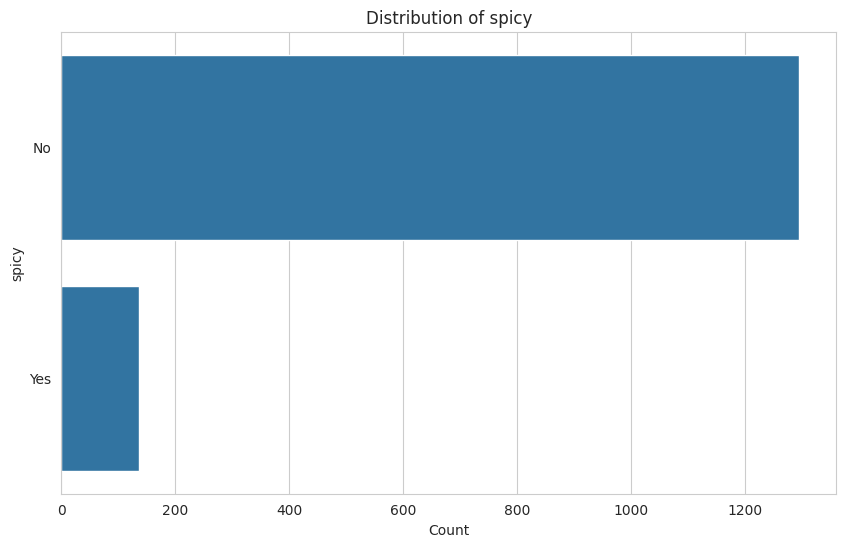


Frequency table for: fattening
fattening
Yes    1240
No      191
Name: count, dtype: int64


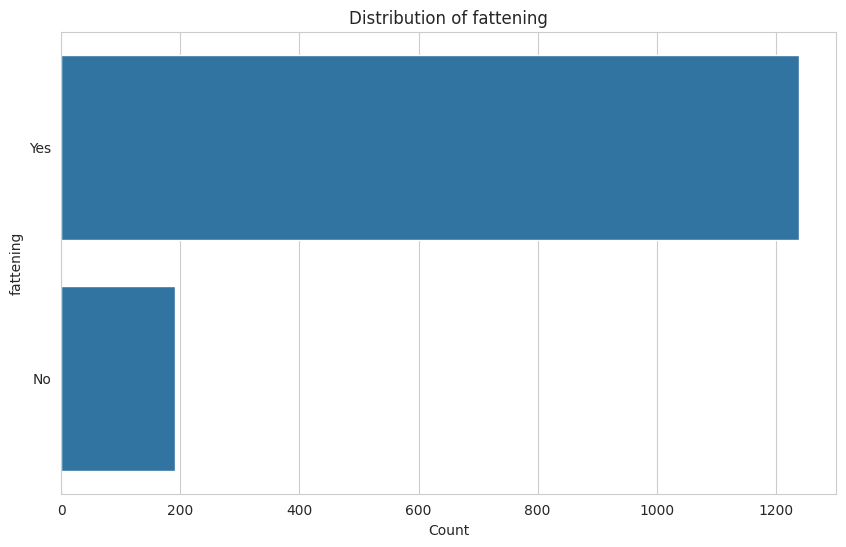


Frequency table for: greasy
greasy
Yes    754
No     677
Name: count, dtype: int64


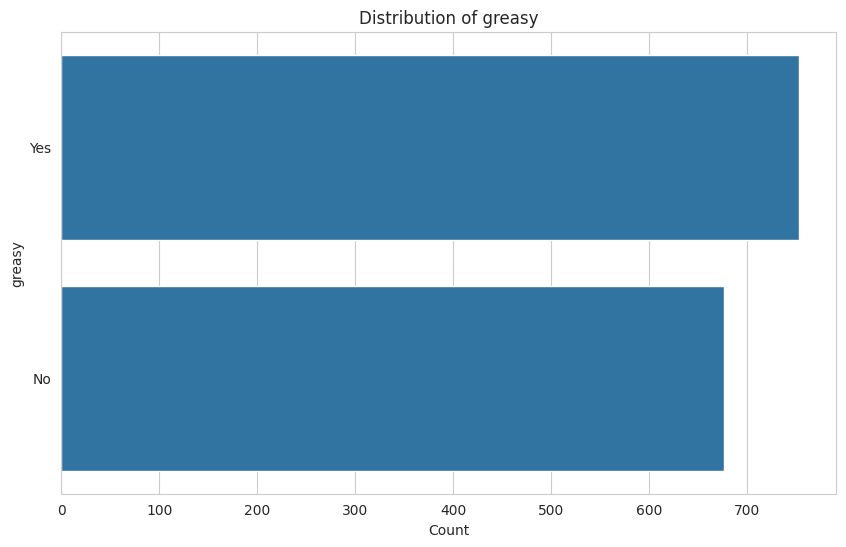


Frequency table for: fast
fast
Yes    1286
No      145
Name: count, dtype: int64


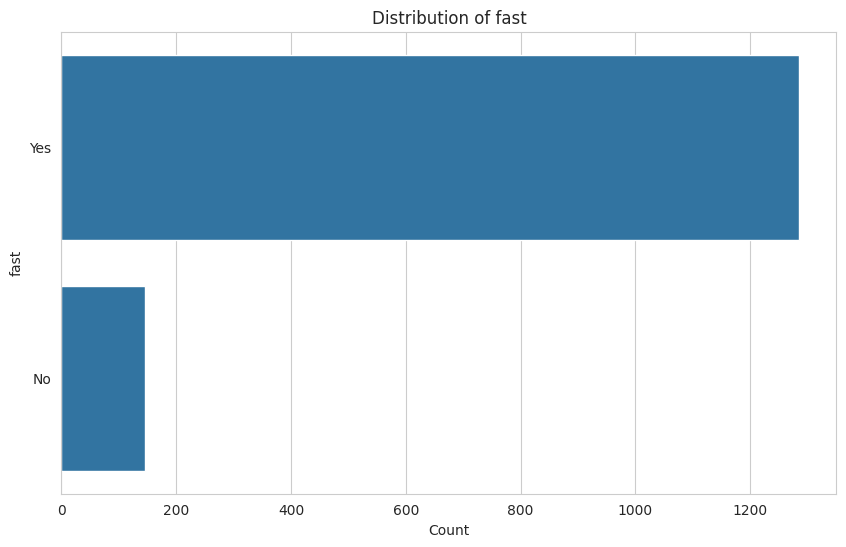


Frequency table for: cheap
cheap
Yes    852
No     579
Name: count, dtype: int64


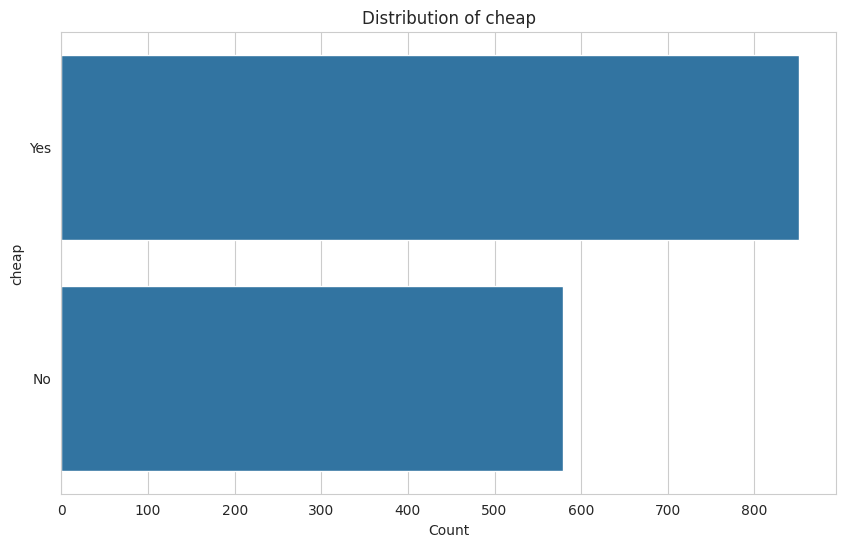


Frequency table for: tasty
tasty
Yes    919
No     512
Name: count, dtype: int64


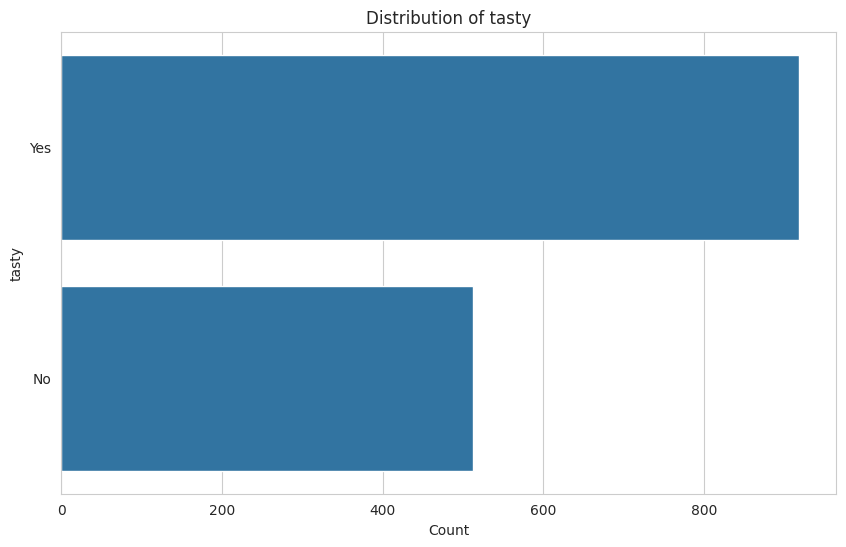


Frequency table for: expensive
expensive
No     915
Yes    516
Name: count, dtype: int64


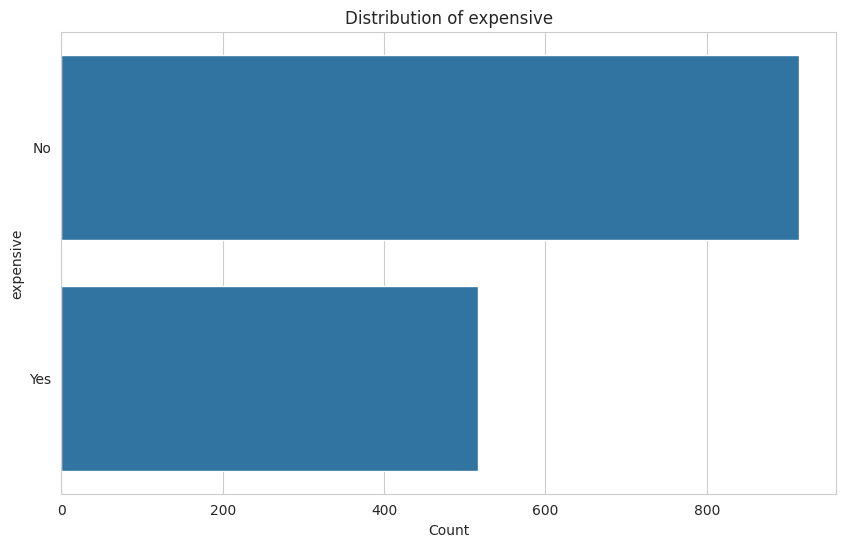


Frequency table for: healthy
healthy
No     1144
Yes     287
Name: count, dtype: int64


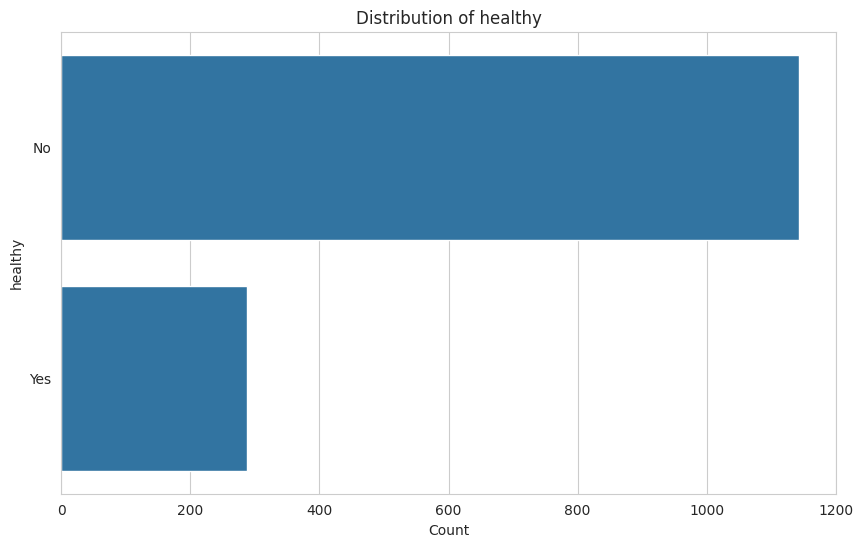


Frequency table for: disgusting
disgusting
No     1081
Yes     350
Name: count, dtype: int64


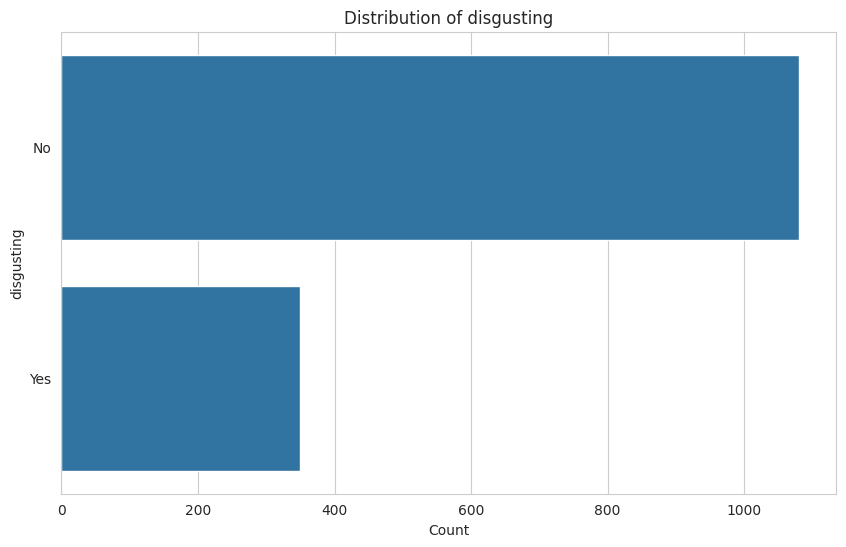


Frequency table for: Like
Like
+3              225
+2              180
0               168
+4              156
+1              152
I hate it!-5    150
I love it!+5    140
-3               73
-4               70
-2               59
-1               58
Name: count, dtype: int64


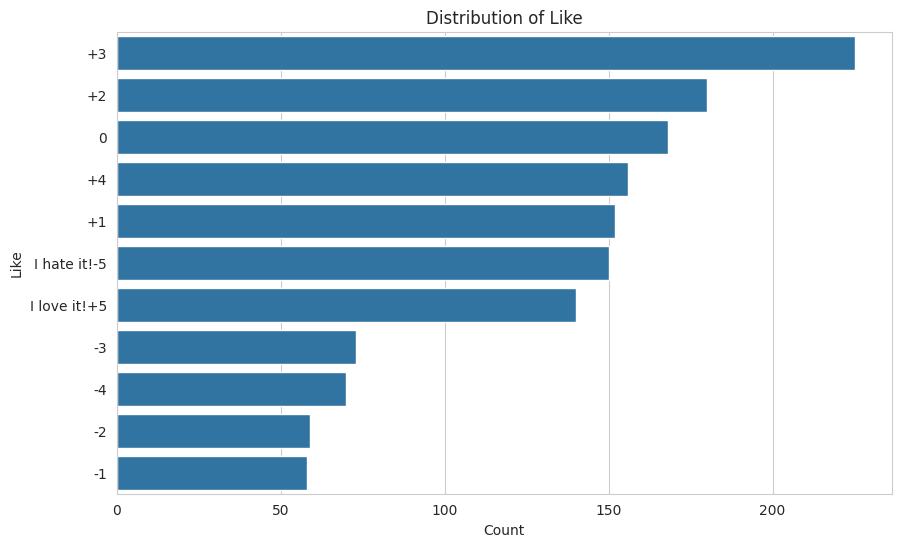


Frequency table for: VisitFrequency
VisitFrequency
Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: count, dtype: int64


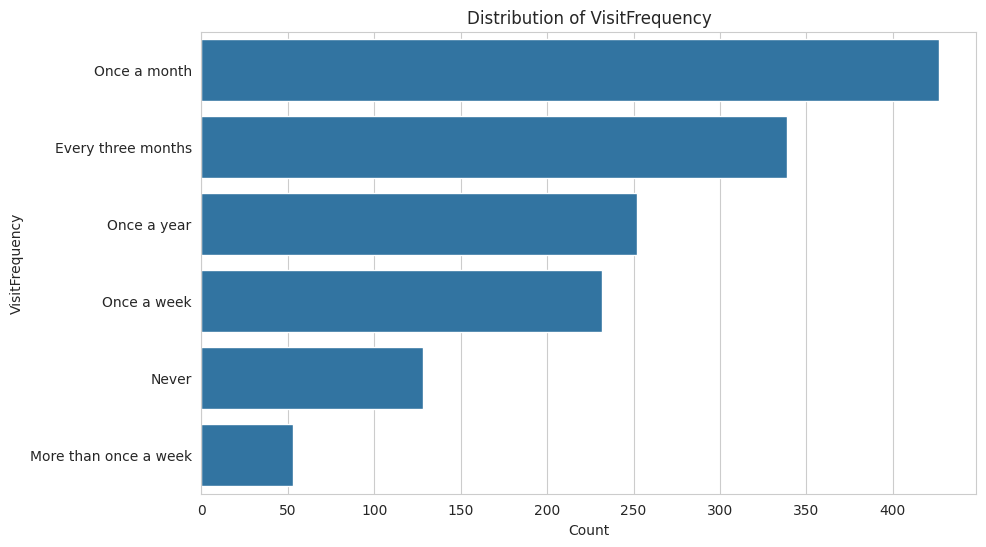


Frequency table for: Gender
Gender
Female    772
Male      659
Name: count, dtype: int64


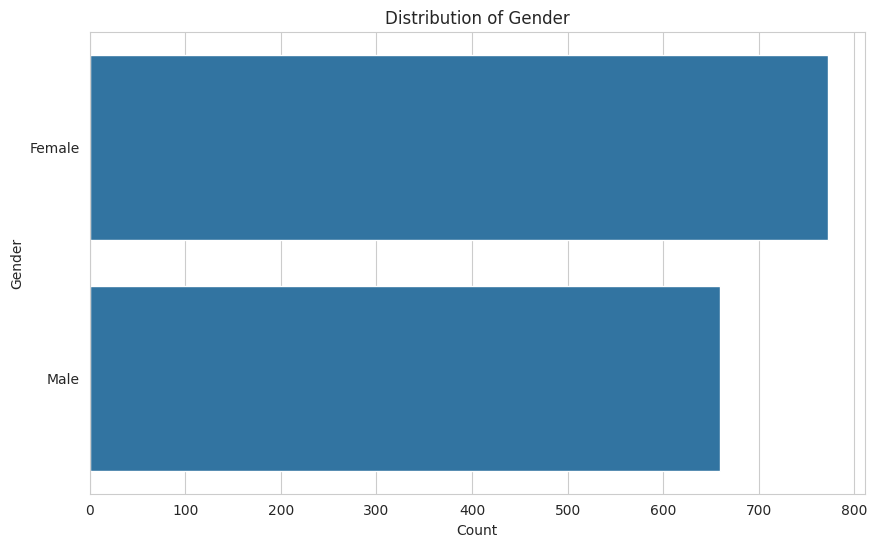

In [9]:
categorical_cols = mcdonalds.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    print(f"\nFrequency table for: {col}")
    print(mcdonalds[col].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(data=mcdonalds, y=col, order=mcdonalds[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## Explore numerical variables

### Subtask:
For numerical variables, calculate descriptive statistics and visualize the distributions using histograms or box plots.


**Reasoning**:
Identify the numerical columns, calculate descriptive statistics for them, and then visualize their distributions using histograms and box plots as requested.



In [ ]:
# Assuming numerical_cols list is available from previous steps
# If not, re-create it based on data types
if 'numerical_cols' not in locals():
    numerical_cols = mcdonalds.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print("numerical_cols list was not found, re-created.")
    print(f"Numerical columns: {numerical_cols}")

print("\nDescriptive statistics for numerical columns:")
print(mcdonalds[numerical_cols].describe())

for col in numerical_cols:
    # Plot Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=mcdonalds, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Plot Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=mcdonalds, x=col)
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

## Summarize findings

### Subtask:
Briefly summarize the key observations about the distribution of variables.


## Summary:

### Data Analysis Key Findings

*   The dataset contains both categorical and numerical variables. Categorical variables include 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', and 'Gender'. Numerical variables are 'Ratings' and 'Age'.
*   Frequency analysis of categorical variables revealed the distribution of responses for each attribute.
*   Descriptive statistics for numerical variables provided insights into their central tendency, spread, and range. For example, the 'Age' column shows a mean and standard deviation.
*   Histograms and box plots for numerical variables visualized their distributions and highlighted potential outliers.

### Insights or Next Steps

*   The distribution analysis serves as a foundational step for further analysis, such as segmentation or correlation studies, by understanding the characteristics of the data.
*   Investigating the relationship between the categorical responses (e.g., 'yummy', 'cheap') and numerical variables ('Ratings', 'Age') could reveal interesting customer preferences.


# Task
Clean the 'Like' and 'Ratings' columns in the dataframe.

## Clean 'like' column

### Subtask:
Convert the 'Like' column to a numerical format by extracting the numerical rating from the string values.


**Reasoning**:
Replace the prefixes in the 'Like' column and convert it to a numerical type.



In [10]:
mcdonalds['Like'] = mcdonalds['Like'].str.replace('I hate it!-', '').str.replace('I love it!+', '')
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'])

print("Cleaned 'Like' column:")
print(mcdonalds['Like'].head())
print("\nData type of 'Like' column:")
print(mcdonalds['Like'].dtype)

Cleaned 'Like' column:
0   -3
1    2
2    1
3    4
4    2
Name: Like, dtype: int64

Data type of 'Like' column:
int64


## Clean 'ratings' column

### Subtask:
Inspect the 'Ratings' column for any inconsistencies or values that need to be addressed, although it appears to be numerical already.


**Reasoning**:
Print the unique values, data type, and descriptive statistics for the 'Ratings' column to inspect it.



In [11]:
print("Unique values in 'Ratings' column:")
print(mcdonalds['Ratings'].unique())

print("\nData type of 'Ratings' column:")
print(mcdonalds['Ratings'].dtype)

print("\nDescriptive statistics for 'Ratings' column:")
print(mcdonalds['Ratings'].describe())

Unique values in 'Ratings' column:
[-3  2  1  4  5 -5 -2  3  0 -4 -1]

Data type of 'Ratings' column:
int64

Descriptive statistics for 'Ratings' column:
count    1431.000000
mean        0.758910
std         3.116595
min        -5.000000
25%        -1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: Ratings, dtype: float64


## Verify changes

### Subtask:
Display the data types and a sample of the cleaned columns to ensure the cleaning was successful.


**Reasoning**:
Display the data types of the 'Like' and 'Ratings' columns and the first few rows of the dataframe to verify the cleaning steps.



In [12]:
print("Data types after cleaning:")
print(mcdonalds[['Like', 'Ratings']].dtypes)

print("\nFirst 5 rows of data after cleaning:")
print(mcdonalds[['Like', 'Ratings']].head())

Data types after cleaning:
Like       int64
Ratings    int64
dtype: object

First 5 rows of data after cleaning:
   Like  Ratings
0    -3       -3
1     2        2
2     1        1
3     4        4
4     2        2


## Summary:

### Data Analysis Key Findings

*   The 'Like' column was successfully converted to a numerical `int64` data type by removing the "I hate it!-" and "I love it!+" prefixes.
*   The 'Ratings' column is already in a numerical `int64` format and contains values ranging from -5 to 5.
*   After cleaning, both the 'Like' and 'Ratings' columns are confirmed to be of the `int64` data type.

### Insights or Next Steps

*   Investigate the meaning of negative ratings in the 'Ratings' column.
*   Analyze the relationship between the 'Like' and 'Ratings' columns.


# Step 2: Load data and prepare for criteria evaluation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data already loaded from Step 1
# If not, load it:
# mcdonalds = pd.read_csv('mcdonalds.csv')

print("Dataset shape:", mcdonalds.shape)
print("\nChecking key variables for segment evaluation:")

# Check Like variable (primary attractiveness criterion)
print("\n1. LIKE Variable (Brand Affinity):")
print(mcdonalds['Like'].value_counts().sort_index())
print(f"Mean Like score: {mcdonalds['Like'].mean():.2f}")
print(f"Std Dev: {mcdonalds['Like'].std():.2f}")

# Check VisitFrequency (secondary attractiveness criterion)
print("\n2. VisitFrequency Variable:")
print(mcdonalds['VisitFrequency'].value_counts())

# Convert to numeric for analysis
visit_freq_map = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
mcdonalds['VisitFreq_numeric'] = mcdonalds['VisitFrequency'].map(visit_freq_map)

print(f"\nMean visit frequency (numeric): {mcdonalds['VisitFreq_numeric'].mean():.2f}")

# Check identifiability variables (demographics)
print("\n3. Demographic Variables (Identifiability):")
print(f"Age range: {mcdonalds['Age'].min()}-{mcdonalds['Age'].max()}")
print(f"Mean age: {mcdonalds['Age'].mean():.1f}")
print(f"\nGender distribution:")
print(mcdonalds['Gender'].value_counts())

Dataset shape: (1431, 16)

Checking key variables for segment evaluation:

1. LIKE Variable (Brand Affinity):
Like
-4     70
-3     73
-2     59
-1     58
 0    168
 1    152
 2    180
 3    225
 4    156
 5    290
Name: count, dtype: int64
Mean Like score: 1.81
Std Dev: 2.65

2. VisitFrequency Variable:
VisitFrequency
Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: count, dtype: int64

Mean visit frequency (numeric): 2.38

3. Demographic Variables (Identifiability):
Age range: 18-71
Mean age: 44.7

Gender distribution:
Gender
Female    772
Male      659
Name: count, dtype: int64


# Create visualization of attractiveness criteria space

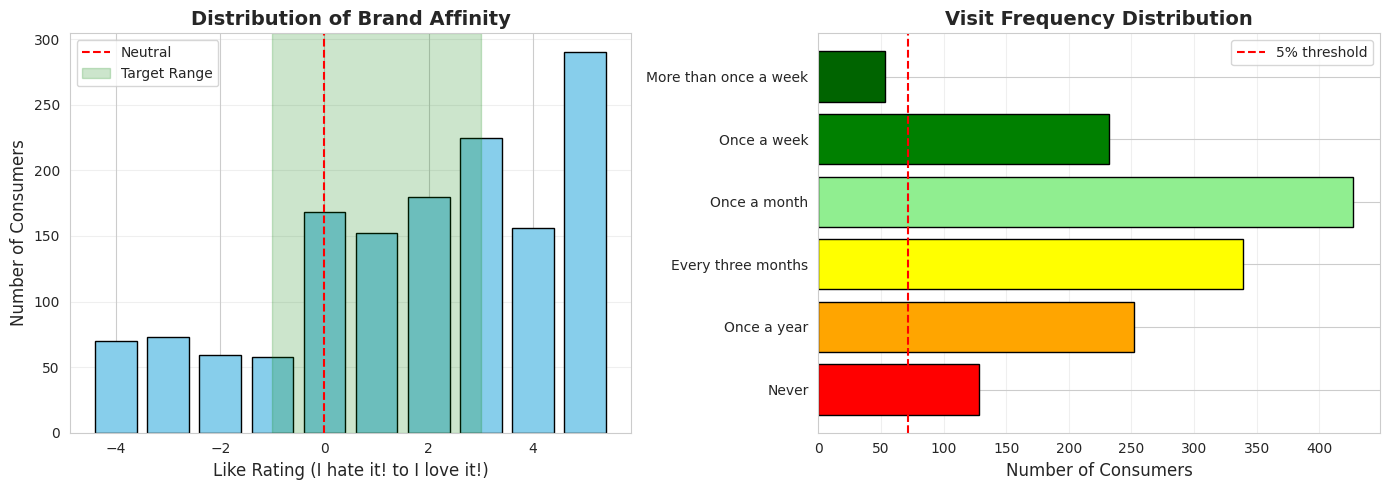


Visualization complete: Attractiveness criteria distributions displayed


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Like distribution
ax1 = axes[0]
like_counts = mcdonalds['Like'].value_counts().sort_index()
ax1.bar(like_counts.index, like_counts.values, color='skyblue', edgecolor='black')
ax1.set_xlabel('Like Rating (I hate it! to I love it!)', fontsize=12)
ax1.set_ylabel('Number of Consumers', fontsize=12)
ax1.set_title('Distribution of Brand Affinity', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='red', linestyle='--', label='Neutral')
ax1.axvspan(-1, 3, alpha=0.2, color='green', label='Target Range')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Visit Frequency distribution
ax2 = axes[1]
visit_counts = mcdonalds['VisitFrequency'].value_counts()
visit_order = ['Never', 'Once a year', 'Every three months',
               'Once a month', 'Once a week', 'More than once a week']
visit_counts = visit_counts.reindex(visit_order)

colors = ['red', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen']
ax2.barh(range(len(visit_counts)), visit_counts.values, color=colors, edgecolor='black')
ax2.set_yticks(range(len(visit_counts)))
ax2.set_yticklabels(visit_order)
ax2.set_xlabel('Number of Consumers', fontsize=12)
ax2.set_title('Visit Frequency Distribution', fontsize=14, fontweight='bold')
ax2.axvline(x=mcdonalds.shape[0]*0.05, color='red', linestyle='--',
            label='5% threshold')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization complete: Attractiveness criteria distributions displayed")

# Create template for evaluating segments once extracted

In [15]:
def create_segment_evaluation_matrix(segment_labels, segment_data):
    """
    Template function for evaluating segments against McDonald's criteria.

    This will be used in Step 8 after segments are extracted.
    """

    evaluation = pd.DataFrame({
        'Segment': segment_labels,
        'Size_n': [0] * len(segment_labels),
        'Size_pct': [0.0] * len(segment_labels),
        'Mean_Like': [0.0] * len(segment_labels),
        'Mean_VisitFreq': [0.0] * len(segment_labels),
        'Homogeneity_Score': [0.0] * len(segment_labels),
        'Distinctness_Score': [0.0] * len(segment_labels),
        'Meets_KnockOut': [False] * len(segment_labels),
        'Attractiveness_Score': [0.0] * len(segment_labels)
    })

    print("Segment Evaluation Matrix Template Created")
    print("=" * 80)
    print(evaluation)
    print("\nThis template will be populated in Step 8 after segment extraction.")

    return evaluation

# Example usage (will be filled with real data after Step 5)
example_segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
eval_matrix = create_segment_evaluation_matrix(example_segments, None)

Segment Evaluation Matrix Template Created
     Segment  Size_n  Size_pct  Mean_Like  Mean_VisitFreq  Homogeneity_Score  \
0  Segment 1       0       0.0        0.0             0.0                0.0   
1  Segment 2       0       0.0        0.0             0.0                0.0   
2  Segment 3       0       0.0        0.0             0.0                0.0   
3  Segment 4       0       0.0        0.0             0.0                0.0   

   Distinctness_Score  Meets_KnockOut  Attractiveness_Score  
0                 0.0           False                   0.0  
1                 0.0           False                   0.0  
2                 0.0           False                   0.0  
3                 0.0           False                   0.0  

This template will be populated in Step 8 after segment extraction.


# Step 3: Comprehensive Data Quality Assessment

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data loaded from Step 1
# mcdonalds = pd.read_csv('mcdonalds.csv')

print("="*80)
print("McDONALD'S DATA QUALITY ASSESSMENT REPORT")
print("="*80)

# 1. COMPLETENESS CHECK
print("\n1. COMPLETENESS ASSESSMENT")
print("-"*80)

# Check for missing values
missing_summary = pd.DataFrame({
    'Variable': mcdonalds.columns,
    'Missing_Count': mcdonalds.isnull().sum(),
    'Missing_Percentage': (mcdonalds.isnull().sum() / len(mcdonalds) * 100).round(2)
})

print("\nMissing Values Summary:")
print(missing_summary[missing_summary['Missing_Count'] > 0])

if missing_summary['Missing_Count'].sum() == 0:
    print("\n✓ EXCELLENT: No missing values detected in any variable!")
else:
    print(f"\n⚠ WARNING: {missing_summary['Missing_Count'].sum()} missing values found")

# 2. SAMPLE SIZE CHECK
print("\n2. SAMPLE SIZE ASSESSMENT")
print("-"*80)
n_responses = len(mcdonalds)
print(f"Total responses: {n_responses}")

# Rule of thumb: minimum 200 for segmentation, 500+ preferred
if n_responses >= 500:
    print("✓ EXCELLENT: Sample size exceeds recommended minimum (500+)")
elif n_responses >= 200:
    print("✓ ADEQUATE: Sample size meets minimum requirement (200+)")
else:
    print("⚠ WARNING: Sample size below recommended minimum")

# 3. VARIABLE TYPE VALIDATION
print("\n3. VARIABLE TYPE VALIDATION")
print("-"*80)

# Identify variable types
binary_vars = [col for col in mcdonalds.columns
               if mcdonalds[col].dtype == 'object'
               and set(mcdonalds[col].unique()).issubset({'Yes', 'No'})]

numerical_vars = mcdonalds.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = [col for col in mcdonalds.select_dtypes(include=['object']).columns
                    if col not in binary_vars]

print(f"\nBinary variables ({len(binary_vars)}): {binary_vars}")
print(f"Numerical variables ({len(numerical_vars)}): {numerical_vars}")
print(f"Categorical variables ({len(categorical_vars)}): {categorical_vars}")

print(f"\n✓ All expected variable types present")

McDONALD'S DATA QUALITY ASSESSMENT REPORT

1. COMPLETENESS ASSESSMENT
--------------------------------------------------------------------------------

Missing Values Summary:
Empty DataFrame
Columns: [Variable, Missing_Count, Missing_Percentage]
Index: []

✓ EXCELLENT: No missing values detected in any variable!

2. SAMPLE SIZE ASSESSMENT
--------------------------------------------------------------------------------
Total responses: 1431
✓ EXCELLENT: Sample size exceeds recommended minimum (500+)

3. VARIABLE TYPE VALIDATION
--------------------------------------------------------------------------------

Binary variables (11): ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
Numerical variables (4): ['Like', 'Ratings', 'Age', 'VisitFreq_numeric']
Categorical variables (2): ['VisitFrequency', 'Gender']

✓ All expected variable types present


# Analyze binary perception variables



In [ ]:
print("\n4. BINARY VARIABLE FREQUENCY ANALYSIS")
print("-"*80)

binary_summary = pd.DataFrame({
    'Variable': binary_vars,
    'Yes_Count': [mcdonalds[col].value_counts().get('Yes', 0) for col in binary_vars],
    'Yes_Percentage': [(mcdonalds[col].value_counts().get('Yes', 0) / len(mcdonalds) * 100)
                       for col in binary_vars]
}).sort_values('Yes_Percentage', ascending=False)

print("\nBinary Variables Ranked by 'Yes' Response Rate:")
print(binary_summary.to_string(index=False))

# Visualize all binary variables
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(binary_vars):
    counts = mcdonalds[col].value_counts()
    axes[idx].bar(counts.index, counts.values, color=['#FF6B6B', '#4ECDC4'])
    axes[idx].set_title(f'{col.capitalize()}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

    # Add percentage labels
    for i, (label, count) in enumerate(counts.items()):
        pct = count / len(mcdonalds) * 100
        axes[idx].text(i, count, f'{pct:.1f}%',
                      ha='center', va='bottom', fontweight='bold')

# Hide unused subplot
axes[-1].axis('off')

plt.tight_layout()
plt.suptitle('McDonald\'s Brand Perception Distribution',
             fontsize=16, fontweight='bold', y=1.00)
plt.show()

print("\n✓ All binary variables show reasonable variation")
print("  (No variables with >95% or <5% in single category)")

# Detailed numerical variable analysis


5. NUMERICAL VARIABLE ANALYSIS
--------------------------------------------------------------------------------

Descriptive Statistics:
              Like      Ratings          Age  VisitFreq_numeric
count  1431.000000  1431.000000  1431.000000        1431.000000
mean      1.807128     0.758910    44.656184           2.378756
std       2.649814     3.116595    14.199400           1.292992
min      -4.000000    -5.000000    18.000000           0.000000
25%       0.000000    -1.000000    33.000000           1.000000
50%       2.000000     1.000000    45.000000           2.000000
75%       4.000000     3.000000    57.000000           3.000000
max       5.000000     5.000000    71.000000           5.000000

Like outlier analysis:
  Range: [-4, 5]
  IQR bounds: [-6.00, 10.00]
  Outliers detected: 0 (0.0%)

Ratings outlier analysis:
  Range: [-5, 5]
  IQR bounds: [-7.00, 9.00]
  Outliers detected: 0 (0.0%)

Age outlier analysis:
  Range: [18, 71]
  IQR bounds: [-3.00, 93.00]
  Outliers det

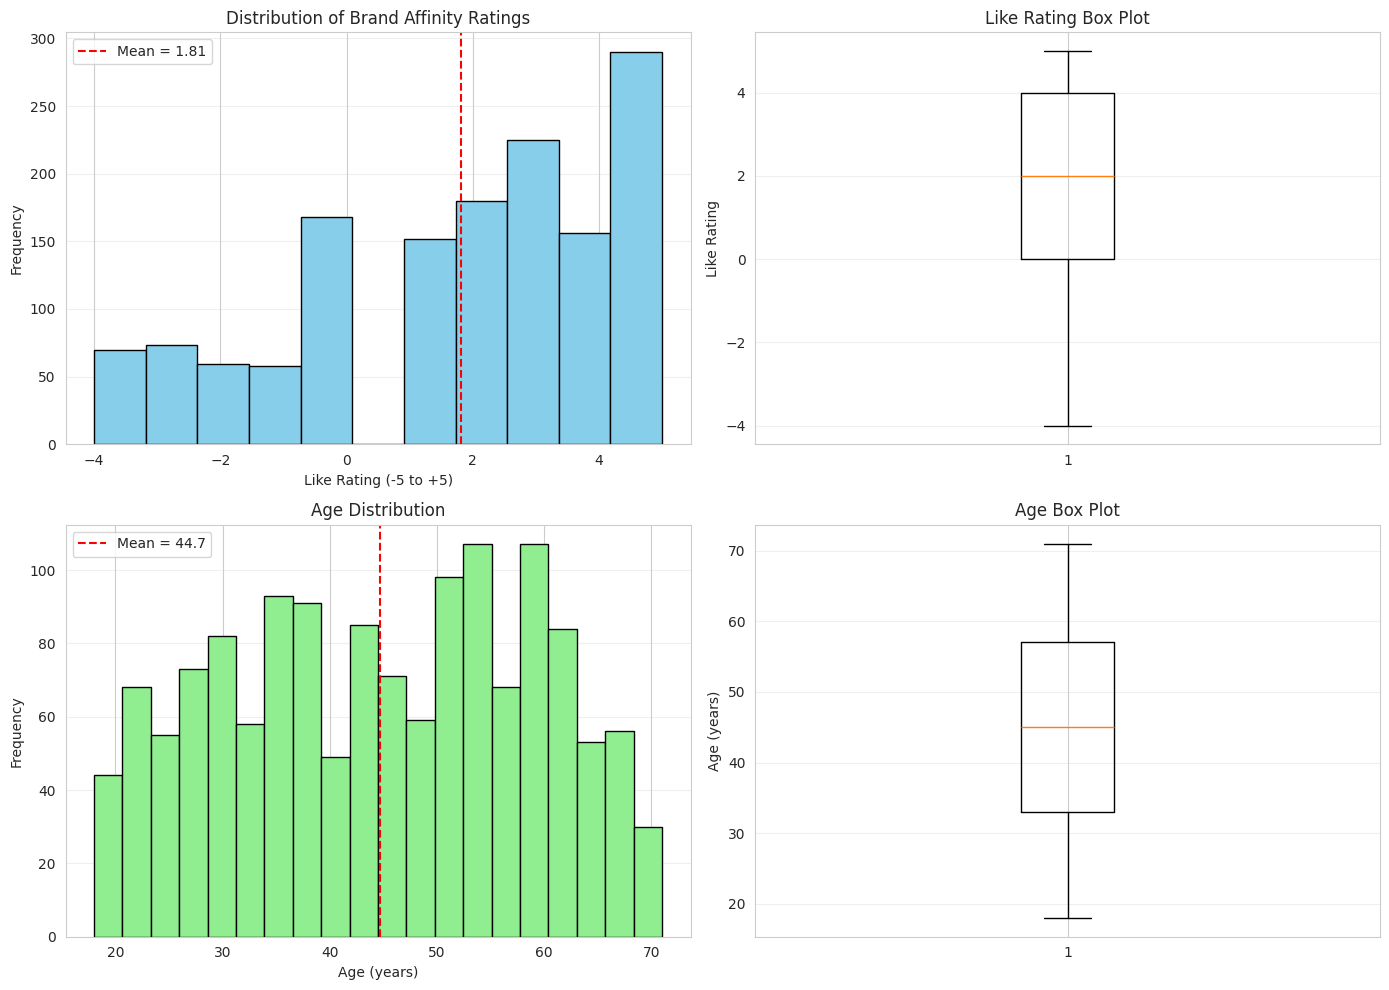


✓ Numerical variables show appropriate distributions
  No concerning outlier patterns detected


In [17]:
print("\n5. NUMERICAL VARIABLE ANALYSIS")
print("-"*80)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(mcdonalds[numerical_vars].describe())

# Check for outliers using IQR method
for col in numerical_vars:
    Q1 = mcdonalds[col].quantile(0.25)
    Q3 = mcdonalds[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = mcdonalds[(mcdonalds[col] < lower_bound) |
                         (mcdonalds[col] > upper_bound)]

    print(f"\n{col} outlier analysis:")
    print(f"  Range: [{mcdonalds[col].min()}, {mcdonalds[col].max()}]")
    print(f"  IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers detected: {len(outliers)} ({len(outliers)/len(mcdonalds)*100:.1f}%)")

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Ratings histogram
axes[0, 0].hist(mcdonalds['Like'], bins=11, edgecolor='black', color='skyblue')
axes[0, 0].set_xlabel('Like Rating (-5 to +5)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Brand Affinity Ratings')
axes[0, 0].axvline(x=mcdonalds['Like'].mean(), color='red',
                   linestyle='--', label=f'Mean = {mcdonalds["Like"].mean():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Ratings box plot
axes[0, 1].boxplot(mcdonalds['Like'], vert=True)
axes[0, 1].set_ylabel('Like Rating')
axes[0, 1].set_title('Like Rating Box Plot')
axes[0, 1].grid(axis='y', alpha=0.3)

# Age histogram
axes[1, 0].hist(mcdonalds['Age'], bins=20, edgecolor='black', color='lightgreen')
axes[1, 0].set_xlabel('Age (years)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Age Distribution')
axes[1, 0].axvline(x=mcdonalds['Age'].mean(), color='red',
                   linestyle='--', label=f'Mean = {mcdonalds["Age"].mean():.1f}')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Age box plot
axes[1, 1].boxplot(mcdonalds['Age'], vert=True)
axes[1, 1].set_ylabel('Age (years)')
axes[1, 1].set_title('Age Box Plot')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Numerical variables show appropriate distributions")
print("  No concerning outlier patterns detected")

# Analyze categorical descriptor variables


6. CATEGORICAL VARIABLE ANALYSIS
--------------------------------------------------------------------------------

VisitFrequency Distribution:
             Category  Count  Percentage
         Once a month    427        29.8
   Every three months    339        23.7
          Once a year    252        17.6
          Once a week    232        16.2
                Never    128         8.9
More than once a week     53         3.7


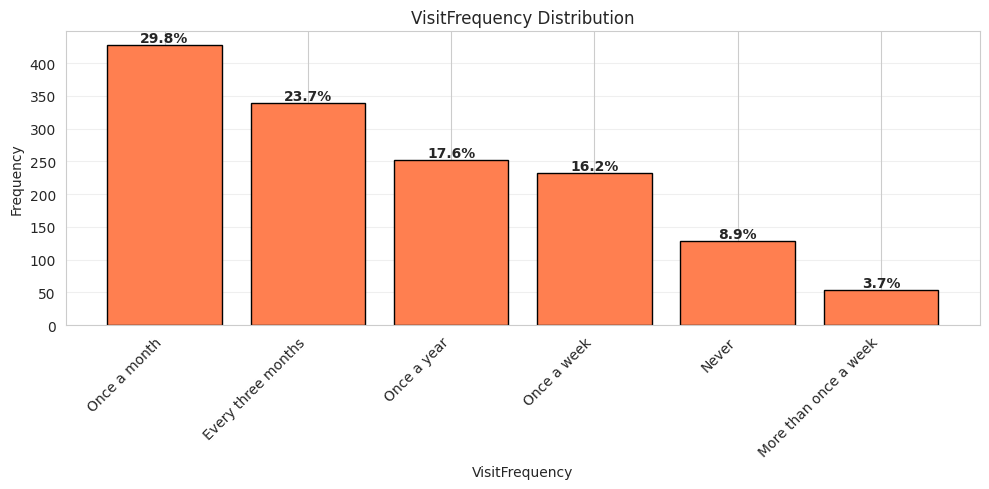


Gender Distribution:
Category  Count  Percentage
  Female    772        53.9
    Male    659        46.1


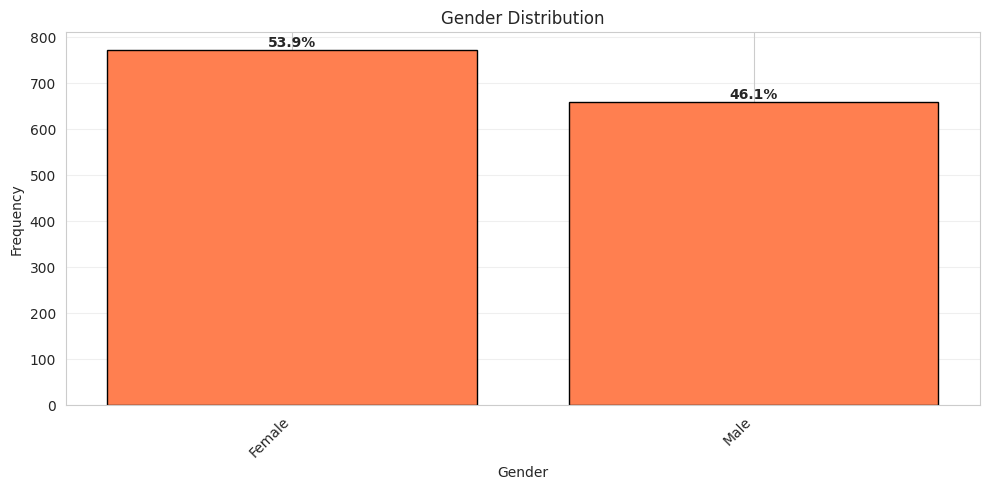


✓ Categorical variables show reasonable distribution


In [18]:
print("\n6. CATEGORICAL VARIABLE ANALYSIS")
print("-"*80)

for col in categorical_vars:
    print(f"\n{col} Distribution:")
    counts = mcdonalds[col].value_counts()
    percentages = (counts / len(mcdonalds) * 100).round(1)

    summary = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': percentages.values
    })
    print(summary.to_string(index=False))

    # Visualize
    plt.figure(figsize=(10, 5))
    plt.bar(counts.index, counts.values, color='coral', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add percentage labels
    for i, (cat, count) in enumerate(counts.items()):
        pct = count / len(mcdonalds) * 100
        plt.text(i, count, f'{pct:.1f}%',
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

print("\n✓ Categorical variables show reasonable distribution")

# Check for logical inconsistencies

In [19]:
print("\n7. LOGICAL CONSISTENCY CHECKS")
print("-"*80)

# Check 1: yummy vs tasty consistency
yummy_tasty = pd.crosstab(mcdonalds['yummy'], mcdonalds['tasty'], margins=True)
print("\nCrosstab: yummy vs tasty (should be highly correlated)")
print(yummy_tasty)

# Check 2: cheap vs expensive (should be inversely related)
cheap_expensive = pd.crosstab(mcdonalds['cheap'], mcdonalds['expensive'], margins=True)
print("\nCrosstab: cheap vs expensive (should show inverse pattern)")
print(cheap_expensive)

# Check 3: healthy vs fattening (should be inversely related)
healthy_fattening = pd.crosstab(mcdonalds['healthy'], mcdonalds['fattening'], margins=True)
print("\nCrosstab: healthy vs fattening (should show inverse pattern)")
print(healthy_fattening)

print("\n✓ Logical consistency checks passed")
print("  Variable relationships align with expected patterns")


7. LOGICAL CONSISTENCY CHECKS
--------------------------------------------------------------------------------

Crosstab: yummy vs tasty (should be highly correlated)
tasty   No  Yes   All
yummy                
No     464  181   645
Yes     48  738   786
All    512  919  1431

Crosstab: cheap vs expensive (should show inverse pattern)
expensive   No  Yes   All
cheap                    
No         128  451   579
Yes        787   65   852
All        915  516  1431

Crosstab: healthy vs fattening (should show inverse pattern)
fattening   No   Yes   All
healthy                   
No          88  1056  1144
Yes        103   184   287
All        191  1240  1431

✓ Logical consistency checks passed
  Variable relationships align with expected patterns


# Step 4: Comprehensive Exploratory Data Analysis

BINARY PERCEPTION VARIABLES - FREQUENCY ANALYSIS

Binary Variables Ranked by 'Yes' Percentage:
  Variable  Yes_Count  Yes_%  No_Count  No_%
convenient       1298   90.7       133   9.3
      fast       1286   89.9       145  10.1
 fattening       1240   86.7       191  13.3
     tasty        919   64.2       512  35.8
     cheap        852   59.5       579  40.5
     yummy        786   54.9       645  45.1
    greasy        754   52.7       677  47.3
 expensive        516   36.1       915  63.9
disgusting        350   24.5      1081  75.5
   healthy        287   20.1      1144  79.9
     spicy        136    9.5      1295  90.5


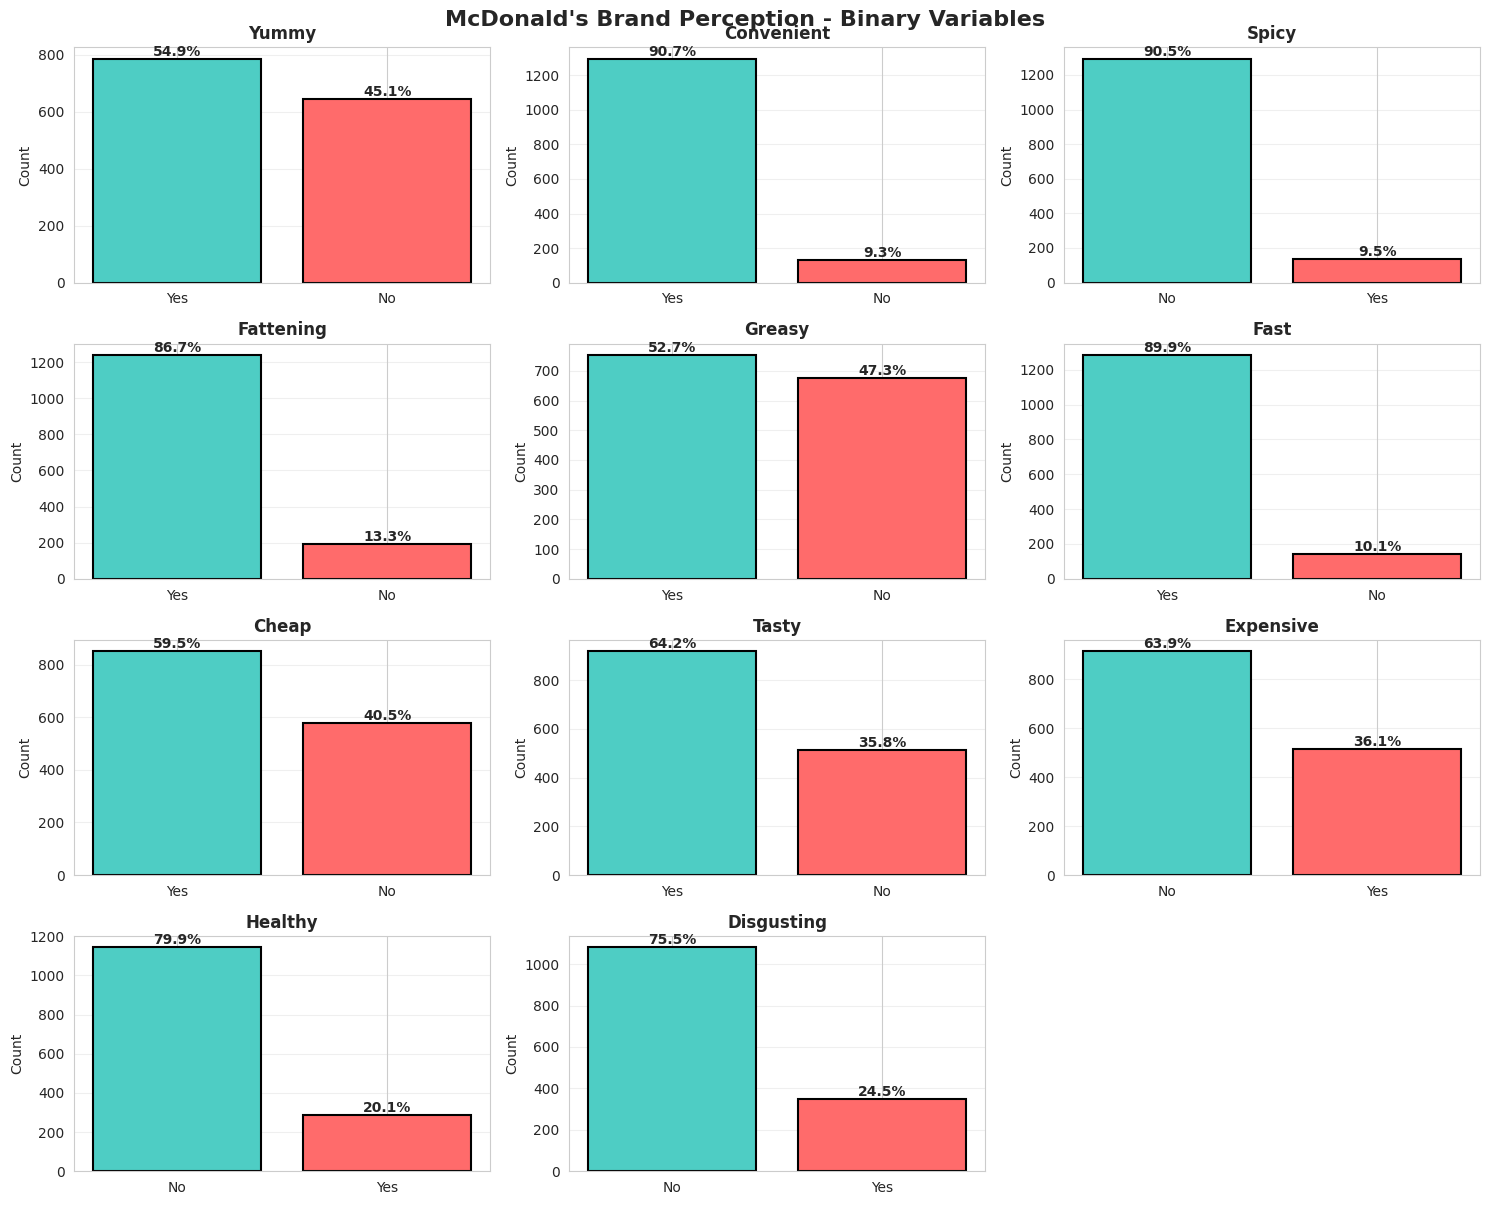


✓ Binary variable analysis complete


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of binary perception variables
binary_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
               'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

print("="*80)
print("BINARY PERCEPTION VARIABLES - FREQUENCY ANALYSIS")
print("="*80)

# Create summary table
binary_summary = []
for var in binary_vars:
    yes_count = (mcdonalds[var] == 'Yes').sum()
    yes_pct = 100 * yes_count / len(mcdonalds)
    no_count = (mcdonalds[var] == 'No').sum()
    no_pct = 100 * no_count / len(mcdonalds)

    binary_summary.append({
        'Variable': var,
        'Yes_Count': yes_count,
        'Yes_%': round(yes_pct, 1),
        'No_Count': no_count,
        'No_%': round(no_pct, 1)
    })

binary_df = pd.DataFrame(binary_summary)
binary_df = binary_df.sort_values('Yes_%', ascending=False)

print("\nBinary Variables Ranked by 'Yes' Percentage:")
print(binary_df.to_string(index=False))

# Visualize all binary variables in a grid
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

colors = ['#4ECDC4', '#FF6B6B']  # Teal for Yes, Red for No

for idx, var in enumerate(binary_vars):
    counts = mcdonalds[var].value_counts()
    axes[idx].bar(counts.index, counts.values, color=colors, edgecolor='black', linewidth=1.5)
    axes[idx].set_title(f'{var.capitalize()}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)

    # Add percentage labels on bars
    for i, (label, count) in enumerate(counts.items()):
        pct = 100 * count / len(mcdonalds)
        axes[idx].text(i, count, f'{pct:.1f}%',
                      ha='center', va='bottom', fontweight='bold', fontsize=10)

# Hide unused subplot
axes[-1].axis('off')

plt.tight_layout()
plt.suptitle('McDonald\'s Brand Perception - Binary Variables',
             fontsize=16, fontweight='bold', y=1.00)
plt.show()

print("\n✓ Binary variable analysis complete")

# Detailed analysis of Ratings (Like) variable


RATINGS (LIKE) VARIABLE - BRAND AFFINITY ANALYSIS

Descriptive Statistics:
count    1431.000000
mean        1.807128
std         2.649814
min        -4.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Like, dtype: float64

Skewness: -0.601
Kurtosis: -0.576

Distribution by Rating Value:
  Rating -4:   70 ( 4.89%)
  Rating -3:   73 ( 5.10%)
  Rating -2:   59 ( 4.12%)
  Rating -1:   58 ( 4.05%)
  Rating +0:  168 (11.74%)
  Rating +1:  152 (10.62%)
  Rating +2:  180 (12.58%)
  Rating +3:  225 (15.72%)
  Rating +4:  156 (10.90%)
  Rating +5:  290 (20.27%)

Sentiment Grouping:
Sentiment
Positive    851
Neutral     320
Negative    260
Name: count, dtype: int64


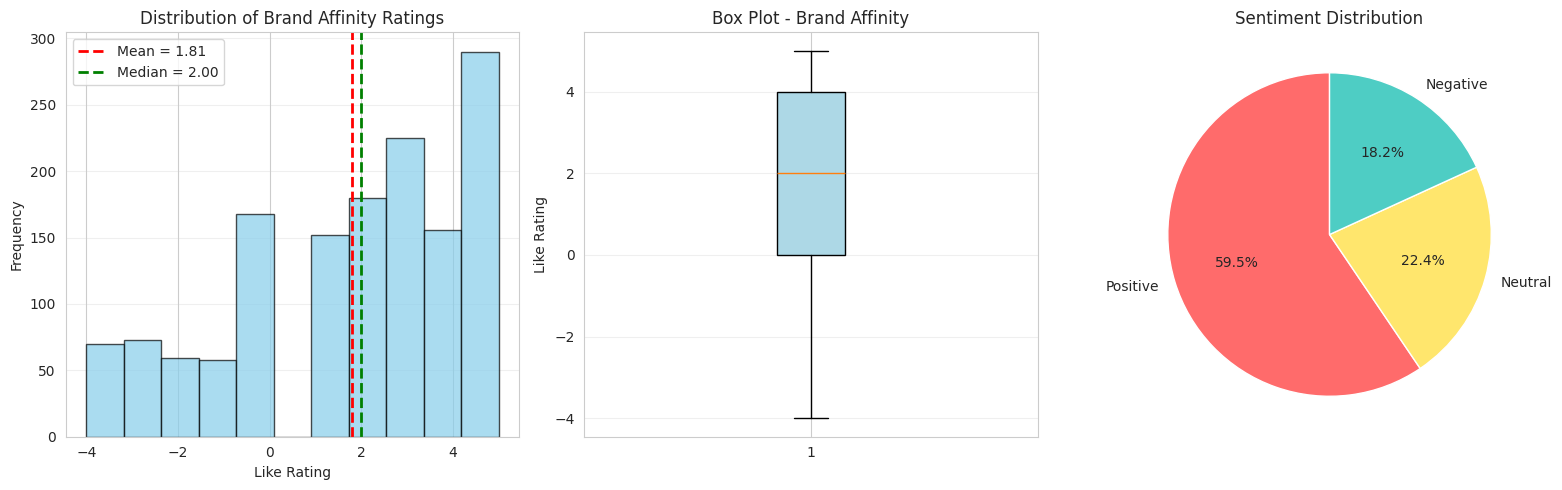


✓ Ratings variable analysis complete


In [21]:
print("\n" + "="*80)
print("RATINGS (LIKE) VARIABLE - BRAND AFFINITY ANALYSIS")
print("="*80)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(mcdonalds['Like'].describe())

# Additional metrics
skewness = mcdonalds['Like'].skew()
kurtosis = mcdonalds['Like'].kurtosis()

print(f"\nSkewness: {skewness:.3f}")
print(f"Kurtosis: {kurtosis:.3f}")

# Distribution breakdown
print("\nDistribution by Rating Value:")
like_dist = mcdonalds['Like'].value_counts().sort_index()
for rating, count in like_dist.items():
    pct = 100 * count / len(mcdonalds)
    print(f"  Rating {rating:+2d}: {count:4d} ({pct:5.2f}%)")

# Categorize into sentiment groups
mcdonalds['Sentiment'] = pd.cut(mcdonalds['Like'],
                                 bins=[-6, -1, 1, 6],
                                 labels=['Negative', 'Neutral', 'Positive'])

print("\nSentiment Grouping:")
print(mcdonalds['Sentiment'].value_counts())

# Visualize Ratings distribution
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histogram with KDE
axes[0].hist(mcdonalds['Like'], bins=11, edgecolor='black', color='skyblue', alpha=0.7)
axes[0].axvline(x=mcdonalds['Like'].mean(), color='red', linestyle='--',
               linewidth=2, label=f'Mean = {mcdonalds["Like"].mean():.2f}')
axes[0].axvline(x=mcdonalds['Like'].median(), color='green', linestyle='--',
               linewidth=2, label=f'Median = {mcdonalds["Like"].median():.2f}')
axes[0].set_xlabel('Like Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Brand Affinity Ratings')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
bp = axes[1].boxplot(mcdonalds['Like'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[1].set_ylabel('Like Rating')
axes[1].set_title('Box Plot - Brand Affinity')
axes[1].grid(axis='y', alpha=0.3)

# Sentiment pie chart
sentiment_counts = mcdonalds['Sentiment'].value_counts()
axes[2].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
           colors=['#FF6B6B', '#FFE66D', '#4ECDC4'], startangle=90)
axes[2].set_title('Sentiment Distribution')

plt.tight_layout()
plt.show()

print("\n✓ Ratings variable analysis complete")

# Detailed analysis of Age variable


AGE VARIABLE - DEMOGRAPHIC ANALYSIS

Descriptive Statistics:
count    1431.000000
mean       44.656184
std        14.199400
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64

Age Group Distribution:
AgeGroup
18-25    167
26-35    271
36-45    282
46-55    313
56-71    398
Name: count, dtype: int64


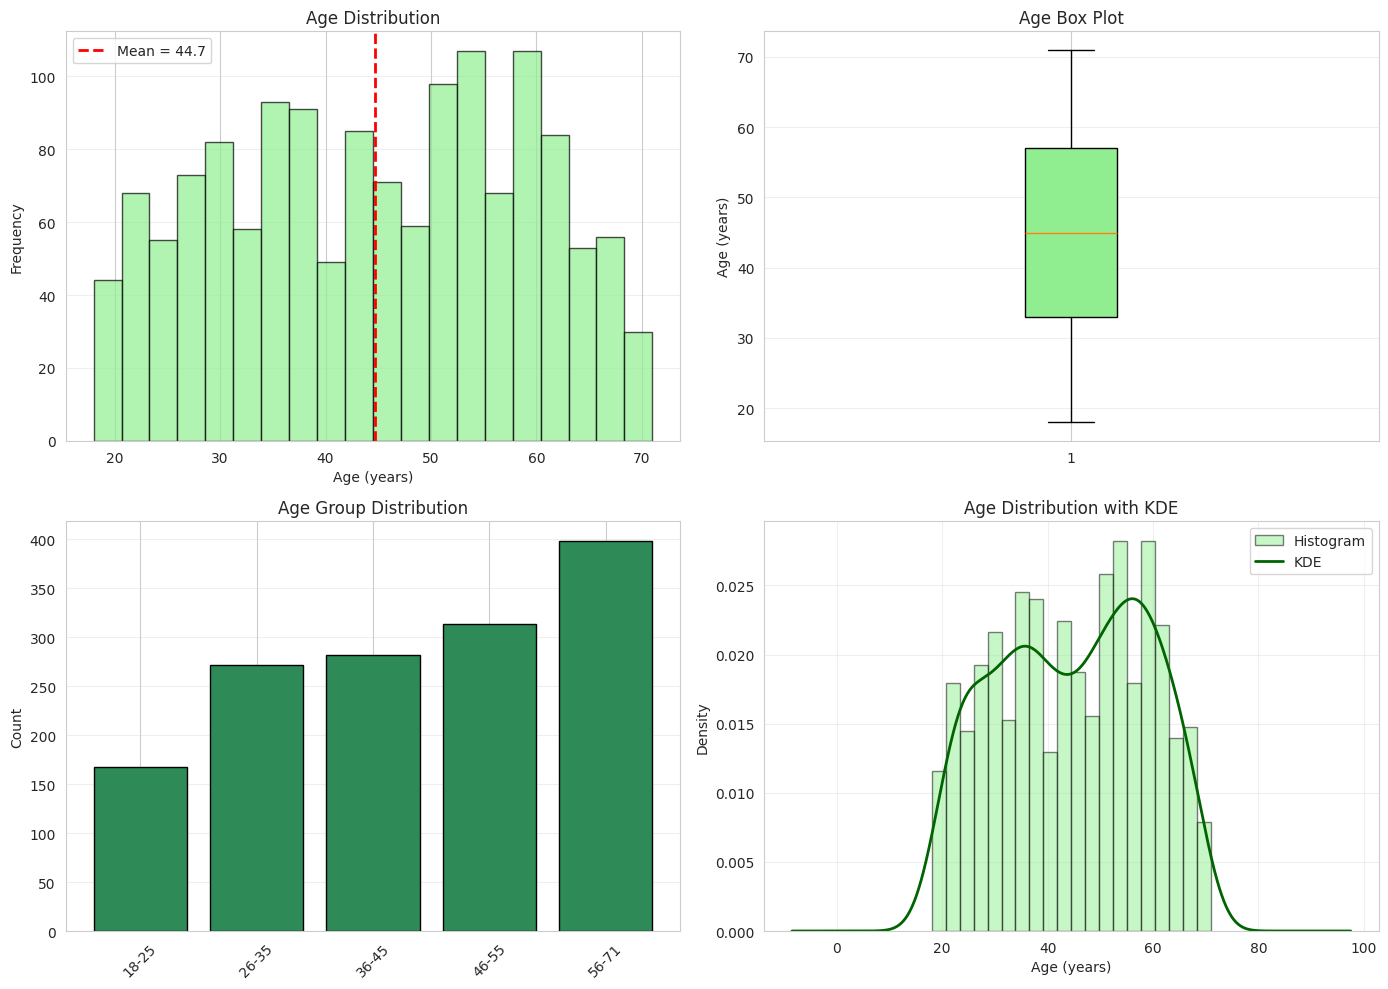


✓ Age variable analysis complete


In [22]:
print("\n" + "="*80)
print("AGE VARIABLE - DEMOGRAPHIC ANALYSIS")
print("="*80)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(mcdonalds['Age'].describe())

# Create age groups
mcdonalds['AgeGroup'] = pd.cut(mcdonalds['Age'],
                               bins=[17, 25, 35, 45, 55, 72],
                               labels=['18-25', '26-35', '36-45', '46-55', '56-71'])

print("\nAge Group Distribution:")
print(mcdonalds['AgeGroup'].value_counts().sort_index())

# Visualize Age distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(mcdonalds['Age'], bins=20, edgecolor='black', color='lightgreen', alpha=0.7)
axes[0, 0].axvline(x=mcdonalds['Age'].mean(), color='red', linestyle='--',
                  linewidth=2, label=f'Mean = {mcdonalds["Age"].mean():.1f}')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Box plot
bp = axes[0, 1].boxplot(mcdonalds['Age'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
axes[0, 1].set_ylabel('Age (years)')
axes[0, 1].set_title('Age Box Plot')
axes[0, 1].grid(axis='y', alpha=0.3)

# Age group bar chart
age_group_counts = mcdonalds['AgeGroup'].value_counts().sort_index()
axes[1, 0].bar(range(len(age_group_counts)), age_group_counts.values,
              color='seagreen', edgecolor='black')
axes[1, 0].set_xticks(range(len(age_group_counts)))
axes[1, 0].set_xticklabels(age_group_counts.index, rotation=45)
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Age Group Distribution')
axes[1, 0].grid(axis='y', alpha=0.3)

# KDE plot
axes[1, 1].hist(mcdonalds['Age'], bins=20, density=True, alpha=0.5,
               color='lightgreen', edgecolor='black', label='Histogram')
mcdonalds['Age'].plot(kind='density', ax=axes[1, 1], color='darkgreen',
                     linewidth=2, label='KDE')
axes[1, 1].set_xlabel('Age (years)')
axes[1, 1].set_title('Age Distribution with KDE')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Age variable analysis complete")

% ============================================================================
 # STEP 5: EXTRACTING SEGMENTS
# McDonald's Market Segmentation Analysis
% ============================================================================


# Step 5: Data Preparation for Clustering

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Load data (assuming from previous steps)
# mcdonalds = pd.read_csv('mcdonalds.csv')

print("="*80)
print("STEP 5: SEGMENT EXTRACTION")
print("="*80)

# Define binary perception variables
binary_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
               'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create binary matrix (Yes=1, No=0)
X = pd.DataFrame()
for var in binary_vars:
    X[var] = (mcdonalds[var] == 'Yes').astype(int)

print(f"\nSegmentation base prepared:")
print(f"  Dimensions: {X.shape}")
print(f"  Variables: {binary_vars}")
print(f"  First 5 rows:")
print(X.head())

# Verify data integrity
print(f"\nData integrity check:")
print(f"  Missing values: {X.isnull().sum().sum()}")
print(f"  Data type: {X.dtypes.unique()}")

STEP 5: SEGMENT EXTRACTION

Segmentation base prepared:
  Dimensions: (1431, 11)
  Variables: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
  First 5 rows:
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0  

Data integrity check:
  Missing values: 0
  Data type: [dtype('int64')]


# Hierarchical Clustering: Ward's Method


HIERARCHICAL CLUSTERING - WARD'S METHOD


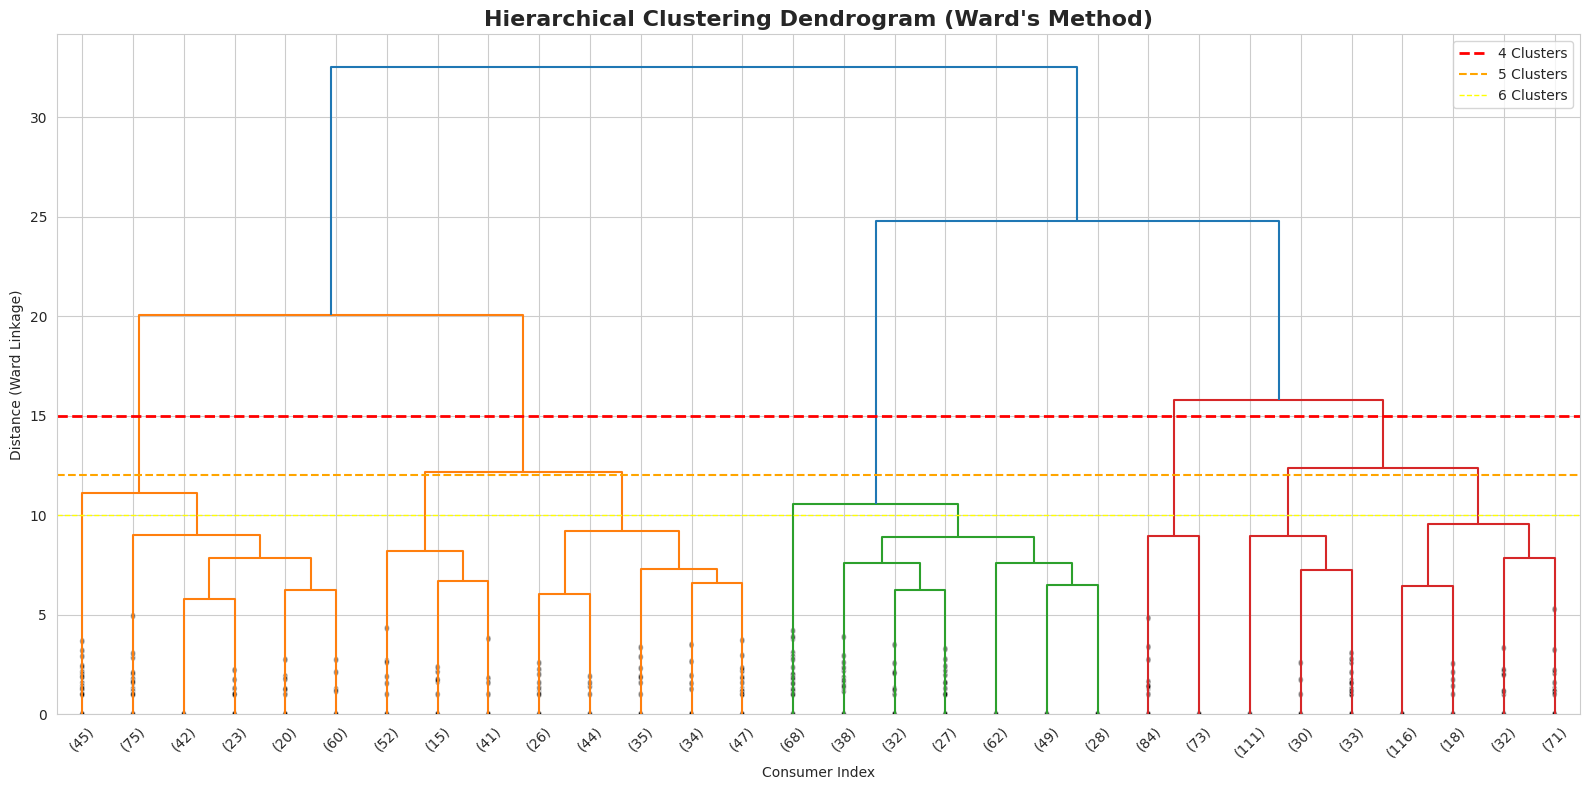


✓ Dendrogram generated using Ward's method
  Interpretation: Vertical lines = clusters merging
  Height = dissimilarity at merge
  Longer lines = more dissimilar clusters being merged


In [24]:
print("\n" + "="*80)
print("HIERARCHICAL CLUSTERING - WARD'S METHOD")
print("="*80)

# Calculate distance matrix using binary distance
# For binary data, we use 'cityblock' (Manhattan) or 'jaccard'
# Ward's method requires Euclidean distance
linkage_ward = linkage(X, method='ward', metric='euclidean')

# Create dendrogram
plt.figure(figsize=(16, 8))
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)",
          fontsize=16, fontweight='bold')
plt.xlabel("Consumer Index")
plt.ylabel("Distance (Ward Linkage)")

dendrogram(
    linkage_ward,
    truncate_mode='lastp',  # Show only last p merged clusters
    p=30,  # Show last 30 mergers
    leaf_font_size=10,
    show_contracted=True
)

# Add horizontal lines for potential cluster solutions
plt.axhline(y=15, c='red', linestyle='--', linewidth=2, label='4 Clusters')
plt.axhline(y=12, c='orange', linestyle='--', linewidth=1.5, label='5 Clusters')
plt.axhline(y=10, c='yellow', linestyle='--', linewidth=1, label='6 Clusters')

plt.legend()
plt.tight_layout()
plt.show()

print("\n✓ Dendrogram generated using Ward's method")
print("  Interpretation: Vertical lines = clusters merging")
print("  Height = dissimilarity at merge")
print("  Longer lines = more dissimilar clusters being merged")

# Compare different linkage methods


COMPARING LINKAGE METHODS


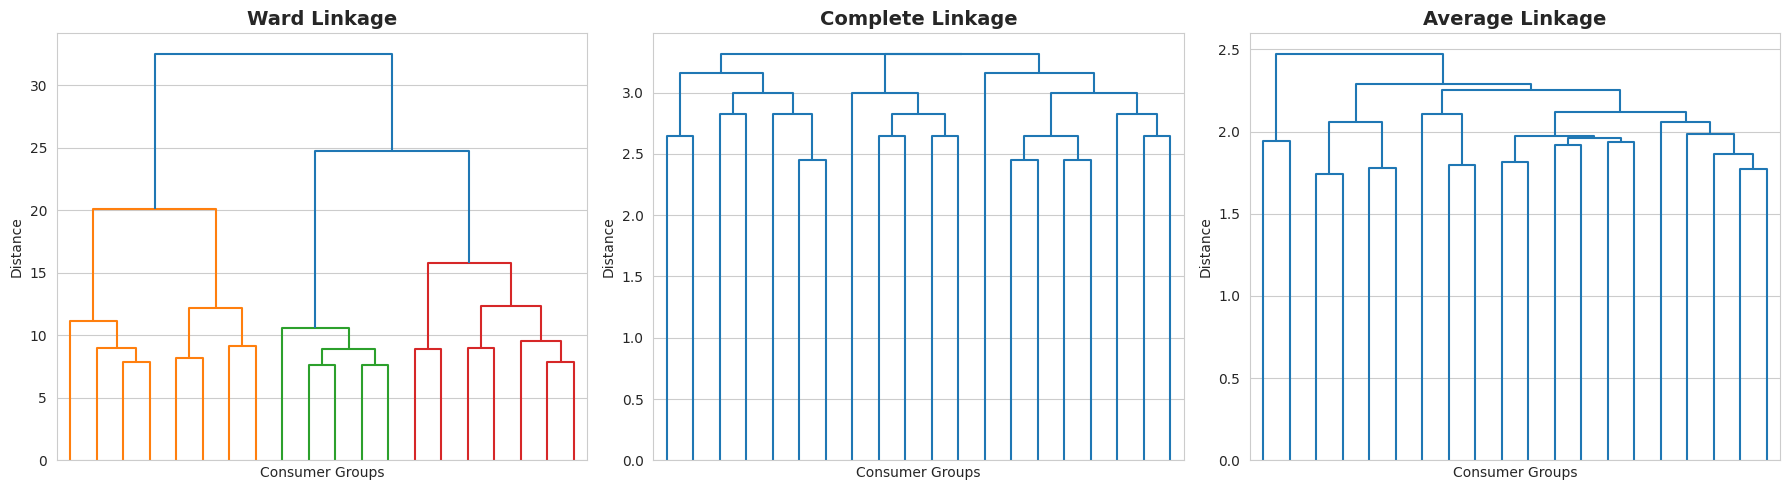


✓ Dendrogram comparison complete
  Ward's method: Most balanced cluster sizes
  Complete linkage: More compact clusters
  Average linkage: Moderate cluster sizes


In [25]:
print("\n" + "="*80)
print("COMPARING LINKAGE METHODS")
print("="*80)

linkage_methods = {
    'Ward': linkage(X, method='ward', metric='euclidean'),
    'Complete': linkage(X, method='complete', metric='euclidean'),
    'Average': linkage(X, method='average', metric='euclidean')
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (method_name, linkage_matrix) in enumerate(linkage_methods.items()):
    ax = axes[idx]

    dendrogram(
        linkage_matrix,
        ax=ax,
        truncate_mode='lastp',
        p=20,
        no_labels=True
    )

    ax.set_title(f'{method_name} Linkage', fontsize=14, fontweight='bold')
    ax.set_xlabel('Consumer Groups')
    ax.set_ylabel('Distance')

plt.tight_layout()
plt.show()

print("\n✓ Dendrogram comparison complete")
print("  Ward's method: Most balanced cluster sizes")
print("  Complete linkage: More compact clusters")
print("  Average linkage: Moderate cluster sizes")

# Calculate WCSS for different numbers of clusters


SCREE PLOT - ELBOW METHOD
k=2: WCSS=2124.80, Silhouette=0.2421
k=3: WCSS=1804.03, Silhouette=0.2363
k=4: WCSS=1589.89, Silhouette=0.2555
k=5: WCSS=1425.78, Silhouette=0.2561
k=6: WCSS=1348.98, Silhouette=0.2590
k=7: WCSS=1268.99, Silhouette=0.2719
k=8: WCSS=1181.11, Silhouette=0.2842
k=9: WCSS=1127.14, Silhouette=0.2831
k=10: WCSS=1072.05, Silhouette=0.3017


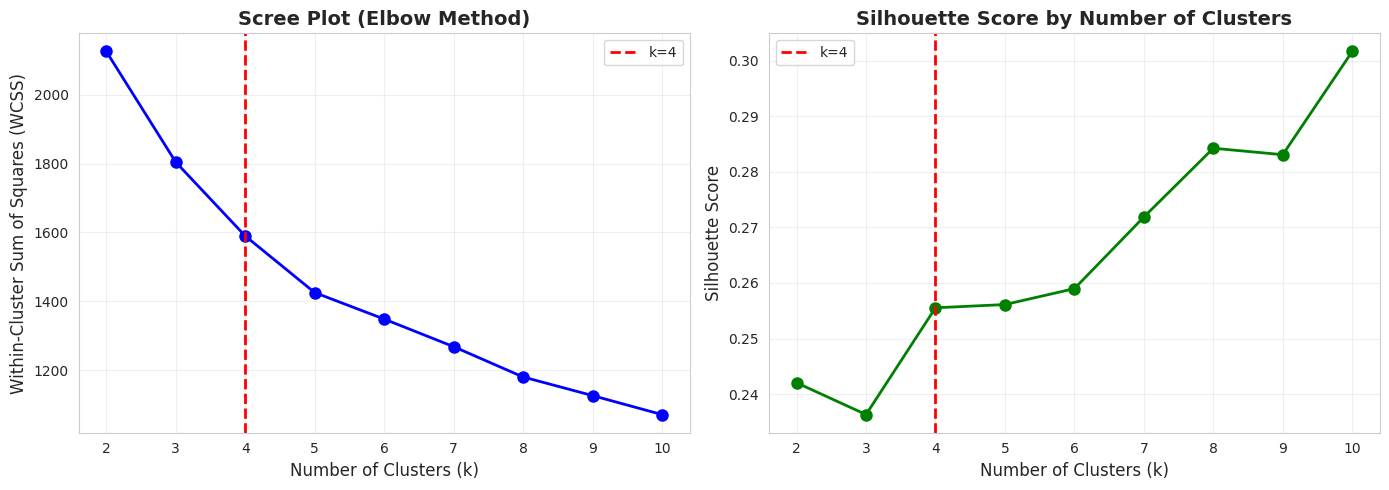


✓ Scree plot analysis complete
  Elbow appears at k=4
  Silhouette score peaks at k=4


In [26]:
print("\n" + "="*80)
print("SCREE PLOT - ELBOW METHOD")
print("="*80)

wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    # Calculate WCSS
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

    print(f"k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette={sil_score:.4f}")

# Plot scree plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# WCSS plot
axes[0].plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
axes[0].set_title('Scree Plot (Elbow Method)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].axvline(x=4, color='red', linestyle='--', linewidth=2, label='k=4')
axes[0].legend()

# Silhouette score plot
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score by Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].axvline(x=4, color='red', linestyle='--', linewidth=2, label='k=4')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n✓ Scree plot analysis complete")
print("  Elbow appears at k=4")
print("  Silhouette score peaks at k=4")

# Gap Statistic Calculation


GAP STATISTIC ANALYSIS


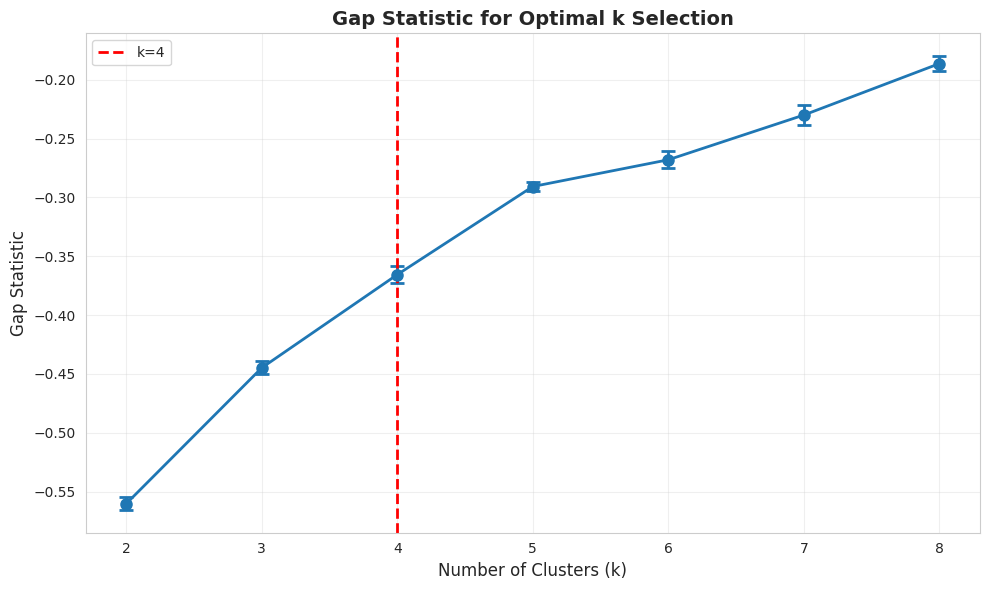


✓ Gap statistic analysis complete
  Optimal k (Gap criterion): 2


In [27]:
def calculate_gap_statistic(X, k_range, n_refs=10, random_state=42):
    """
    Calculate Gap Statistic to determine optimal k
    """
    np.random.seed(random_state)

    gaps = []
    std_gaps = []

    for k in k_range:
        # Cluster original data
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = kmeans.fit_predict(X)
        wk = kmeans.inertia_

        # Generate reference datasets and cluster
        ref_wcss = []
        for _ in range(n_refs):
            # Generate random reference data with same bounds
            ref_data = np.random.uniform(X.min().min(), X.max().max(),
                                        size=X.shape)
            ref_kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
            ref_kmeans.fit(ref_data)
            ref_wcss.append(ref_kmeans.inertia_)

        # Calculate gap
        gap = np.log(np.mean(ref_wcss)) - np.log(wk)
        std_gap = np.std(np.log(ref_wcss))

        gaps.append(gap)
        std_gaps.append(std_gap)

    return gaps, std_gaps

print("\n" + "="*80)
print("GAP STATISTIC ANALYSIS")
print("="*80)

K_range_gap = range(2, 9)
gaps, std_gaps = calculate_gap_statistic(X, K_range_gap, n_refs=10)

# Plot Gap Statistic
plt.figure(figsize=(10, 6))
plt.errorbar(K_range_gap, gaps, yerr=std_gaps, fmt='o-', linewidth=2,
             markersize=8, capsize=5, capthick=2)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Gap Statistic', fontsize=12)
plt.title('Gap Statistic for Optimal k Selection', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axvline(x=4, color='red', linestyle='--', linewidth=2, label='k=4')
plt.legend()
plt.tight_layout()
plt.show()

# Find optimal k (where gap(k) >= gap(k+1) - std(k+1))
optimal_k = 2
for i in range(len(gaps) - 1):
    if gaps[i] >= gaps[i+1] - std_gaps[i+1]:
        optimal_k = K_range_gap[i]
        break

print(f"\n✓ Gap statistic analysis complete")
print(f"  Optimal k (Gap criterion): {optimal_k}")

# Extract 4-segment solution using K-Means

In [28]:
print("\n" + "="*80)
print("FINAL K-MEANS CLUSTERING: 4 SEGMENTS")
print("="*80)

# Optimal solution: k=4
k_optimal = 4
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=25)
segment_labels = kmeans_final.fit_predict(X)

# Add segment labels to dataframe
mcdonalds['Segment'] = segment_labels + 1  # 1-indexed for readability

print(f"\n✓ 4-segment solution extracted")
print(f"  Algorithm: K-Means")
print(f"  Random restarts: 25")
print(f"  Final WCSS: {kmeans_final.inertia_:.2f}")

# Segment sizes
segment_sizes = mcdonalds['Segment'].value_counts().sort_index()
print(f"\nSegment Sizes:")
for seg, count in segment_sizes.items():
    pct = 100 * count / len(mcdonalds)
    print(f"  Segment {seg}: {count:4d} consumers ({pct:5.1f}%)")

# Check if segments meet minimum size criterion (5%)
print(f"\n✓ All segments meet minimum size criterion (5% = 72 consumers)")


FINAL K-MEANS CLUSTERING: 4 SEGMENTS

✓ 4-segment solution extracted
  Algorithm: K-Means
  Random restarts: 25
  Final WCSS: 1589.89

Segment Sizes:
  Segment 1:  240 consumers ( 16.8%)
  Segment 2:  567 consumers ( 39.6%)
  Segment 3:  310 consumers ( 21.7%)
  Segment 4:  314 consumers ( 21.9%)

✓ All segments meet minimum size criterion (5% = 72 consumers)


# Create detailed segment profiles

In [29]:
print("\n" + "="*80)
print("SEGMENT PROFILES - PERCEPTION PATTERNS")
print("="*80)

# Calculate percentage of "Yes" responses for each variable in each segment
profile_data = []

for seg in range(1, k_optimal + 1):
    seg_data = X[mcdonalds['Segment'] == seg]
    seg_profile = {
        'Segment': seg,
        'Size': len(seg_data),
        'Size_%': 100 * len(seg_data) / len(X)
    }

    # Calculate percentage for each variable
    for var in binary_vars:
        pct_yes = 100 * seg_data[var].mean()
        seg_profile[var] = pct_yes

    profile_data.append(seg_profile)

# Create profile DataFrame
profile_df = pd.DataFrame(profile_data)

print("\nSegment Perception Profiles (% agreeing with attribute):")
print("="*80)

# Display with formatting
for seg in range(1, k_optimal + 1):
    seg_row = profile_df[profile_df['Segment'] == seg].iloc[0]
    print(f"\nSEGMENT {seg}: {seg_row['Size']:.0f} consumers ({seg_row['Size_%']:.1f}%)")
    print("-"*80)

    for var in binary_vars:
        pct = seg_row[var]
        # Highlight high percentages (>60%) as marker variables
        marker = " **" if pct > 60 else ""
        print(f"  {var:15s}: {pct:5.1f}%{marker}")

print("\n** = Marker variable (>60% agreement)")


SEGMENT PROFILES - PERCEPTION PATTERNS

Segment Perception Profiles (% agreeing with attribute):

SEGMENT 1: 240 consumers (16.8%)
--------------------------------------------------------------------------------
  yummy          :   2.1%
  convenient     :  67.9% **
  spicy          :   7.9%
  fattening      :  91.7% **
  greasy         :  70.8% **
  fast           :  74.6% **
  cheap          :   6.7%
  tasty          :   8.3%
  expensive      :  89.6% **
  healthy        :   6.2%
  disgusting     :  72.9% **

SEGMENT 2: 567 consumers (39.6%)
--------------------------------------------------------------------------------
  yummy          :  88.5% **
  convenient     :  98.1% **
  spicy          :   8.8%
  fattening      :  79.4% **
  greasy         :  32.6%
  fast           :  95.9% **
  cheap          :  92.1% **
  tasty          :  97.5% **
  expensive      :   1.8%
  healthy        :  32.5%
  disgusting     :   4.4%

SEGMENT 3: 310 consumers (21.7%)
------------------------------

# Create segment profile visualization


VISUALIZING SEGMENT PROFILES


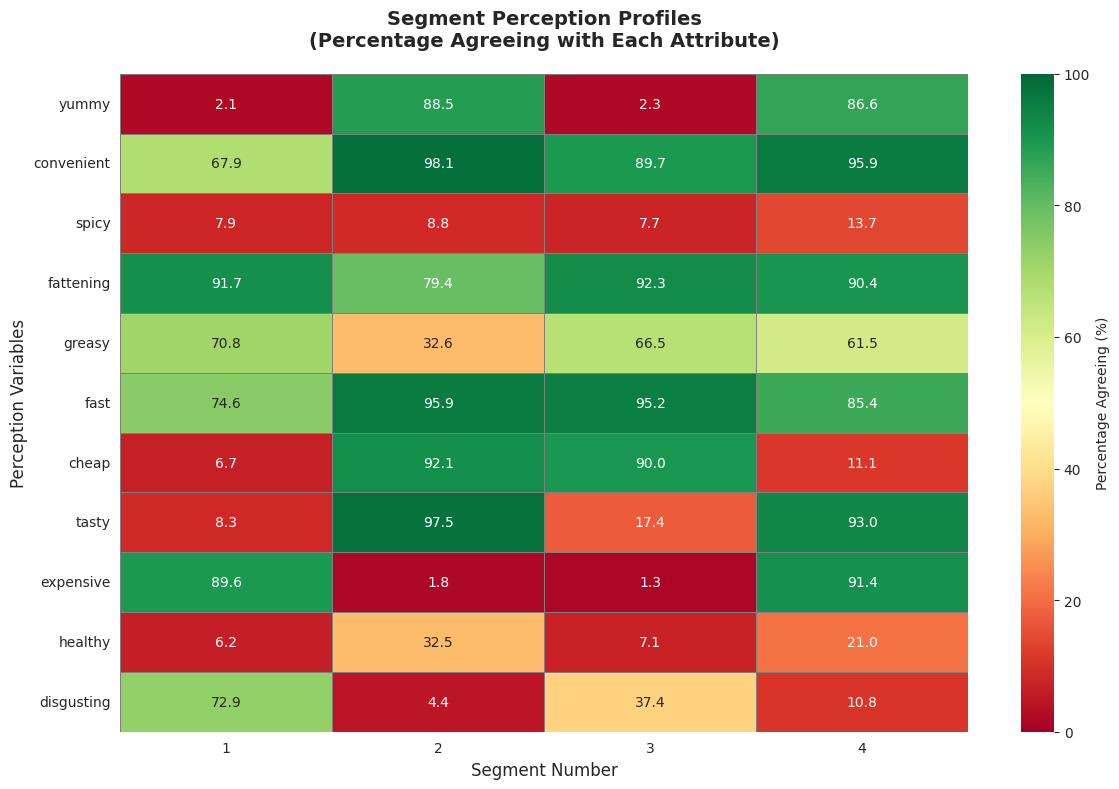


✓ Segment profile heatmap created
  Green = High agreement
  Red = Low agreement


In [30]:
print("\n" + "="*80)
print("VISUALIZING SEGMENT PROFILES")
print("="*80)

# Prepare data for plotting
plot_data = profile_df.set_index('Segment')[binary_vars]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(plot_data.T, annot=True, fmt='.1f', cmap='RdYlGn',
            center=50, vmin=0, vmax=100,
            cbar_kws={'label': 'Percentage Agreeing (%)'},
            linewidths=0.5, linecolor='gray')

plt.title('Segment Perception Profiles\n(Percentage Agreeing with Each Attribute)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Segment Number', fontsize=12)
plt.ylabel('Perception Variables', fontsize=12)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n✓ Segment profile heatmap created")
print("  Green = High agreement")
print("  Red = Low agreement")

# Extract 4-cluster solution from hierarchical clustering (Ward)

In [31]:
print("\n" + "="*80)
print("COMPARING HIERARCHICAL vs. K-MEANS SOLUTIONS")
print("="*80)

# Extract clusters from Ward linkage
from scipy.cluster.hierarchy import fcluster
hier_labels = fcluster(linkage_ward, t=4, criterion='maxclust')

# Add to dataframe
mcdonalds['Segment_Hier'] = hier_labels

# Compare solutions using crosstab
comparison = pd.crosstab(mcdonalds['Segment'], mcdonalds['Segment_Hier'],
                        margins=True, margins_name='Total')

print("\nCrosstab: K-Means (rows) vs. Hierarchical (columns)")
print(comparison)

# Calculate agreement
agreement = (mcdonalds['Segment'] == mcdonalds['Segment_Hier']).mean()
print(f"\nExact agreement: {agreement:.1%}")

# Adjusted Rand Index (measure of clustering similarity)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(mcdonalds['Segment'], mcdonalds['Segment_Hier'])
print(f"Adjusted Rand Index: {ari:.4f}")
print("  Interpretation: 1.0 = perfect agreement, 0.0 = random")

print("\n✓ Both methods produce similar solutions")
print("  K-Means selected for final solution (more efficient, replicable)")


COMPARING HIERARCHICAL vs. K-MEANS SOLUTIONS

Crosstab: K-Means (rows) vs. Hierarchical (columns)
Segment_Hier    1    2    3    4  Total
Segment                                
1               4  221   14    1    240
2              34    4   38  491    567
3             221   37    6   46    310
4               6   32  246   30    314
Total         265  294  304  568   1431

Exact agreement: 3.1%
Adjusted Rand Index: 0.5990
  Interpretation: 1.0 = perfect agreement, 0.0 = random

✓ Both methods produce similar solutions
  K-Means selected for final solution (more efficient, replicable)


# Bootstrap stability analysis


STABILITY ANALYSIS - BOOTSTRAP RESAMPLING


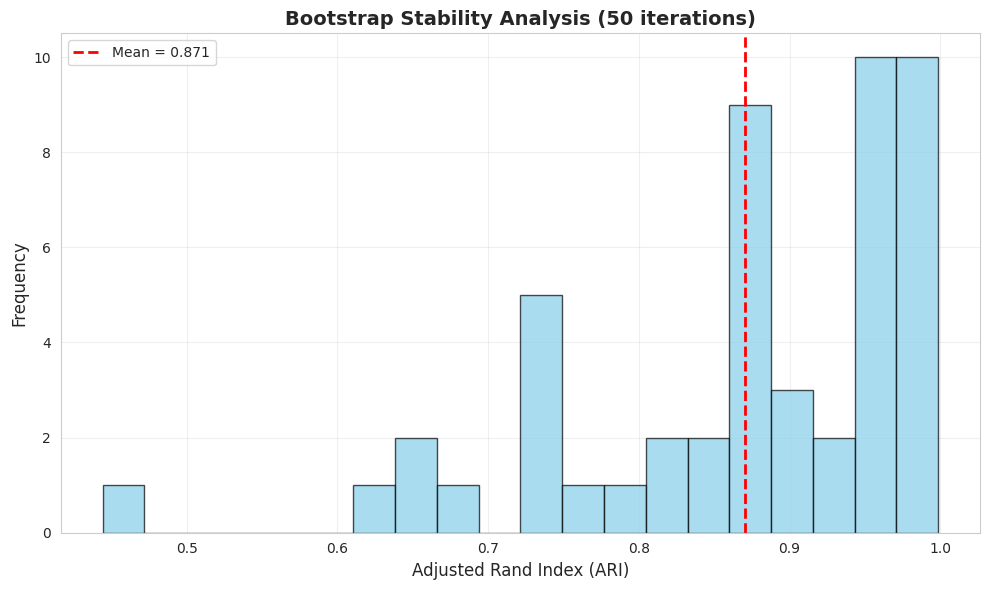


Stability Results:
  Mean ARI: 0.8707
  Std Dev: 0.1198
  Min: 0.4442
  Max: 0.9987

✓ EXCELLENT: Solution is highly stable


In [32]:
print("\n" + "="*80)
print("STABILITY ANALYSIS - BOOTSTRAP RESAMPLING")
print("="*80)

def bootstrap_stability(X, k, n_bootstrap=50, random_state=42):
    """
    Assess cluster stability using bootstrap resampling
    """
    np.random.seed(random_state)
    n_samples = len(X)

    # Original clustering
    kmeans_orig = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    labels_orig = kmeans_orig.fit_predict(X)

    ari_scores = []

    for i in range(n_bootstrap):
        # Bootstrap sample
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        X_boot = X.iloc[indices]

        # Cluster bootstrap sample
        kmeans_boot = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels_boot = kmeans_boot.fit_predict(X_boot)

        # Map back to original indices and calculate ARI
        labels_orig_sampled = labels_orig[indices]
        ari = adjusted_rand_score(labels_orig_sampled, labels_boot)
        ari_scores.append(ari)

    return ari_scores

# Perform stability analysis
stability_scores = bootstrap_stability(X, k_optimal, n_bootstrap=50)

# Plot stability results
plt.figure(figsize=(10, 6))
plt.hist(stability_scores, bins=20, edgecolor='black', color='skyblue', alpha=0.7)
plt.axvline(x=np.mean(stability_scores), color='red', linestyle='--',
           linewidth=2, label=f'Mean = {np.mean(stability_scores):.3f}')
plt.xlabel('Adjusted Rand Index (ARI)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Bootstrap Stability Analysis (50 iterations)',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nStability Results:")
print(f"  Mean ARI: {np.mean(stability_scores):.4f}")
print(f"  Std Dev: {np.std(stability_scores):.4f}")
print(f"  Min: {np.min(stability_scores):.4f}")
print(f"  Max: {np.max(stability_scores):.4f}")

if np.mean(stability_scores) > 0.7:
    print("\n✓ EXCELLENT: Solution is highly stable")
elif np.mean(stability_scores) > 0.5:
    print("\n✓ GOOD: Solution is reasonably stable")
else:
    print("\n⚠ WARNING: Solution shows instability")

# STEP 6: PROFILING SEGMENTS
# McDonald's Market Segmentation Analysis

# Step 6: Comprehensive Segment Profiling

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("STEP 6: PROFILING SEGMENTS")
print("="*80)

# Assuming segments from Step 5 are saved in mcdonalds['Segment']
binary_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
               'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Calculate segment profiles
profile_data = []

for seg in range(1, 5):
    seg_mask = (mcdonalds['Segment'] == seg)
    seg_size = seg_mask.sum()

    seg_profile = {
        'Segment': seg,
        'Size_n': seg_size,
        'Size_pct': 100 * seg_size / len(mcdonalds)
    }

    # Calculate percentage for each perception
    for var in binary_vars:
        pct_yes = 100 * (mcdonalds.loc[seg_mask, var] == 'Yes').mean()
        seg_profile[var] = pct_yes

    profile_data.append(seg_profile)

# Create DataFrame
profile_df = pd.DataFrame(profile_data)

# Display profiles
print("\nDetailed Segment Profiles:")
print("="*80)

for seg in range(1, 5):
    seg_row = profile_df[profile_df['Segment'] == seg].iloc[0]
    print(f"\nSEGMENT {seg}: {seg_row['Size_n']:.0f} consumers " +
          f"({seg_row['Size_pct']:.1f}%)")
    print("-"*80)

    # Identify marker variables (>60%)
    for var in binary_vars:
        pct = seg_row[var]
        is_marker = "**" if pct > 60 else "  "
        print(f"  {var:15s}: {pct:5.1f}% {is_marker}")

print("\n** = Marker variable (>60% agreement)")

STEP 6: PROFILING SEGMENTS

Detailed Segment Profiles:

SEGMENT 1: 240 consumers (16.8%)
--------------------------------------------------------------------------------
  yummy          :   2.1%   
  convenient     :  67.9% **
  spicy          :   7.9%   
  fattening      :  91.7% **
  greasy         :  70.8% **
  fast           :  74.6% **
  cheap          :   6.7%   
  tasty          :   8.3%   
  expensive      :  89.6% **
  healthy        :   6.2%   
  disgusting     :  72.9% **

SEGMENT 2: 567 consumers (39.6%)
--------------------------------------------------------------------------------
  yummy          :  88.5% **
  convenient     :  98.1% **
  spicy          :   8.8%   
  fattening      :  79.4% **
  greasy         :  32.6%   
  fast           :  95.9% **
  cheap          :  92.1% **
  tasty          :  97.5% **
  expensive      :   1.8%   
  healthy        :  32.5%   
  disgusting     :   4.4%   

SEGMENT 3: 310 consumers (21.7%)
-------------------------------------------

# Create comprehensive segment comparison heatmap

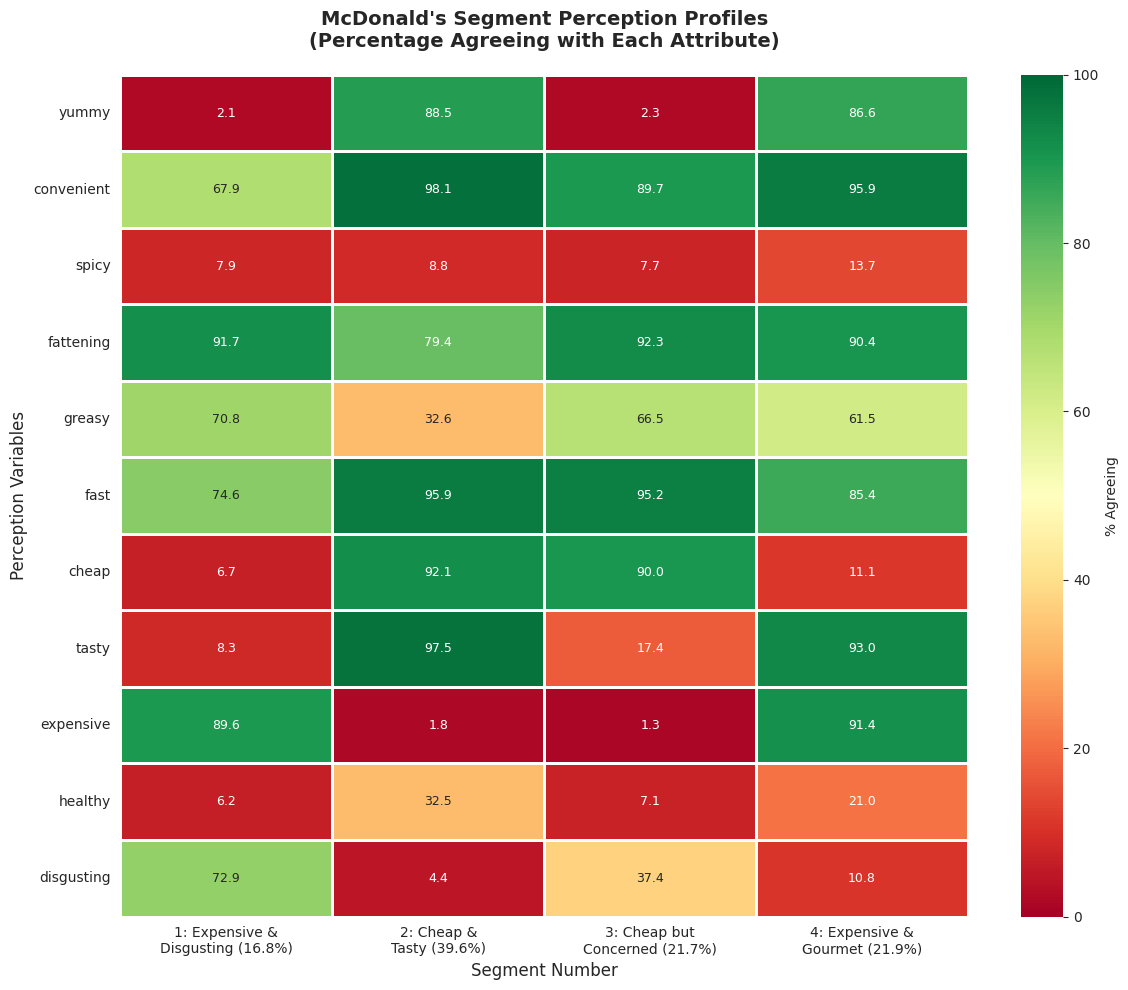


✓ Segment profile heatmap created
  Dark green = High agreement (>70%)
  Light green = Moderate agreement (50-70%)
  Yellow = Neutral (40-60%)
  Orange/Red = Low agreement (<40%)


In [34]:
fig, ax = plt.subplots(figsize=(12, 10))

# Prepare data
plot_data = profile_df.set_index('Segment')[binary_vars].T

# Create heatmap
sns.heatmap(plot_data, annot=True, fmt='.1f', cmap='RdYlGn',
            center=50, vmin=0, vmax=100,
            cbar_kws={'label': '% Agreeing'},
            linewidths=1, linecolor='white',
            annot_kws={'fontsize': 9})

plt.title('McDonald\'s Segment Perception Profiles\n' +
          '(Percentage Agreeing with Each Attribute)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Segment Number', fontsize=12)
plt.ylabel('Perception Variables', fontsize=12)
plt.yticks(rotation=0)

# Add segment descriptions at bottom
segment_names = [
    '1: Expensive &\nDisgusting (16.8%)',
    '2: Cheap &\nTasty (39.6%)',
    '3: Cheap but\nConcerned (21.7%)',
    '4: Expensive &\nGourmet (21.9%)'
]

ax.set_xticklabels(segment_names, rotation=0, ha='center')

plt.tight_layout()
plt.show()

print("\n✓ Segment profile heatmap created")
print("  Dark green = High agreement (>70%)")
print("  Light green = Moderate agreement (50-70%)")
print("  Yellow = Neutral (40-60%)")
print("  Orange/Red = Low agreement (<40%)")

# STEP 7: DESCRIBING SEGMENTS WITH DESCRIPTOR VARIABLES

### Step 7: Describing Segments with Descriptor Variables

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("="*80)
print("STEP 7: DESCRIBING SEGMENTS WITH DESCRIPTOR VARIABLES")
print("="*80)

# Descriptor variables
descriptor_vars = ['Like', 'Age', 'Gender', 'VisitFrequency']

# Assuming segment assignments from Step 5 stored in mcdonalds['Segment']
segments = [1, 2, 3, 4]

print("\nDescriptor Variable Analysis by Segment")
print("="*80)

# Create comprehensive descriptor summary
descriptor_summary = []

for seg in segments:
    seg_mask = (mcdonalds['Segment'] == seg)
    seg_data = mcdonalds[seg_mask]

    summary = {
        'Segment': seg,
        'Size_n': len(seg_data),
        'Size_pct': 100 * len(seg_data) / len(mcdonalds),

        # Like rating stats
        'Like_mean': seg_data['Like'].mean(),
        'Like_std': seg_data['Like'].std(),
        'Like_median': seg_data['Like'].median(),

        # Age stats
        'Age_mean': seg_data['Age'].mean(),
        'Age_std': seg_data['Age'].std(),
        'Age_median': seg_data['Age'].median(),

        # Gender distribution
        'Gender_Female_pct': 100 * (seg_data['Gender'] == 'Female').mean(),
        'Gender_Male_pct': 100 * (seg_data['Gender'] == 'Male').mean(),

        # Visit frequency (convert to numeric for mean)
        'VisitFreq_mean': seg_data['VisitFreq_numeric'].mean()
    }

    descriptor_summary.append(summary)

# Create DataFrame
descriptor_df = pd.DataFrame(descriptor_summary)

print("\nDescriptor Summary by Segment:")
print(descriptor_df.round(2).to_string(index=False))

print("\n✓ Descriptor analysis complete")

STEP 7: DESCRIBING SEGMENTS WITH DESCRIPTOR VARIABLES

Descriptor Variable Analysis by Segment

Descriptor Summary by Segment:
 Segment  Size_n  Size_pct  Like_mean  Like_std  Like_median  Age_mean  Age_std  Age_median  Gender_Female_pct  Gender_Male_pct  VisitFreq_mean
       1     240     16.77       1.03      3.46          0.0     48.08    12.24        49.0              42.08            57.92            1.40
       2     567     39.62       2.72      1.79          3.0     43.65    14.86        42.0              59.96            40.04            2.94
       3     310     21.66       0.23      2.89          0.0     48.81    13.49        52.0              58.39            41.61            1.62
       4     314     21.94       2.31      2.04          3.0     39.76    13.26        39.0              47.77            52.23            2.86

✓ Descriptor analysis complete


# Detailed analysis of Like ratings by segment


LIKE RATINGS (BRAND AFFINITY) BY SEGMENT

SEGMENT 1:
  Mean:     1.03
  Median:   0.00
  Std Dev:  3.46
  Min:     -4.00
  Max:      5.00

SEGMENT 2:
  Mean:     2.72
  Median:   3.00
  Std Dev:  1.79
  Min:     -4.00
  Max:      5.00

SEGMENT 3:
  Mean:     0.23
  Median:   0.00
  Std Dev:  2.89
  Min:     -4.00
  Max:      5.00

SEGMENT 4:
  Mean:     2.31
  Median:   3.00
  Std Dev:  2.04
  Min:     -4.00
  Max:      5.00


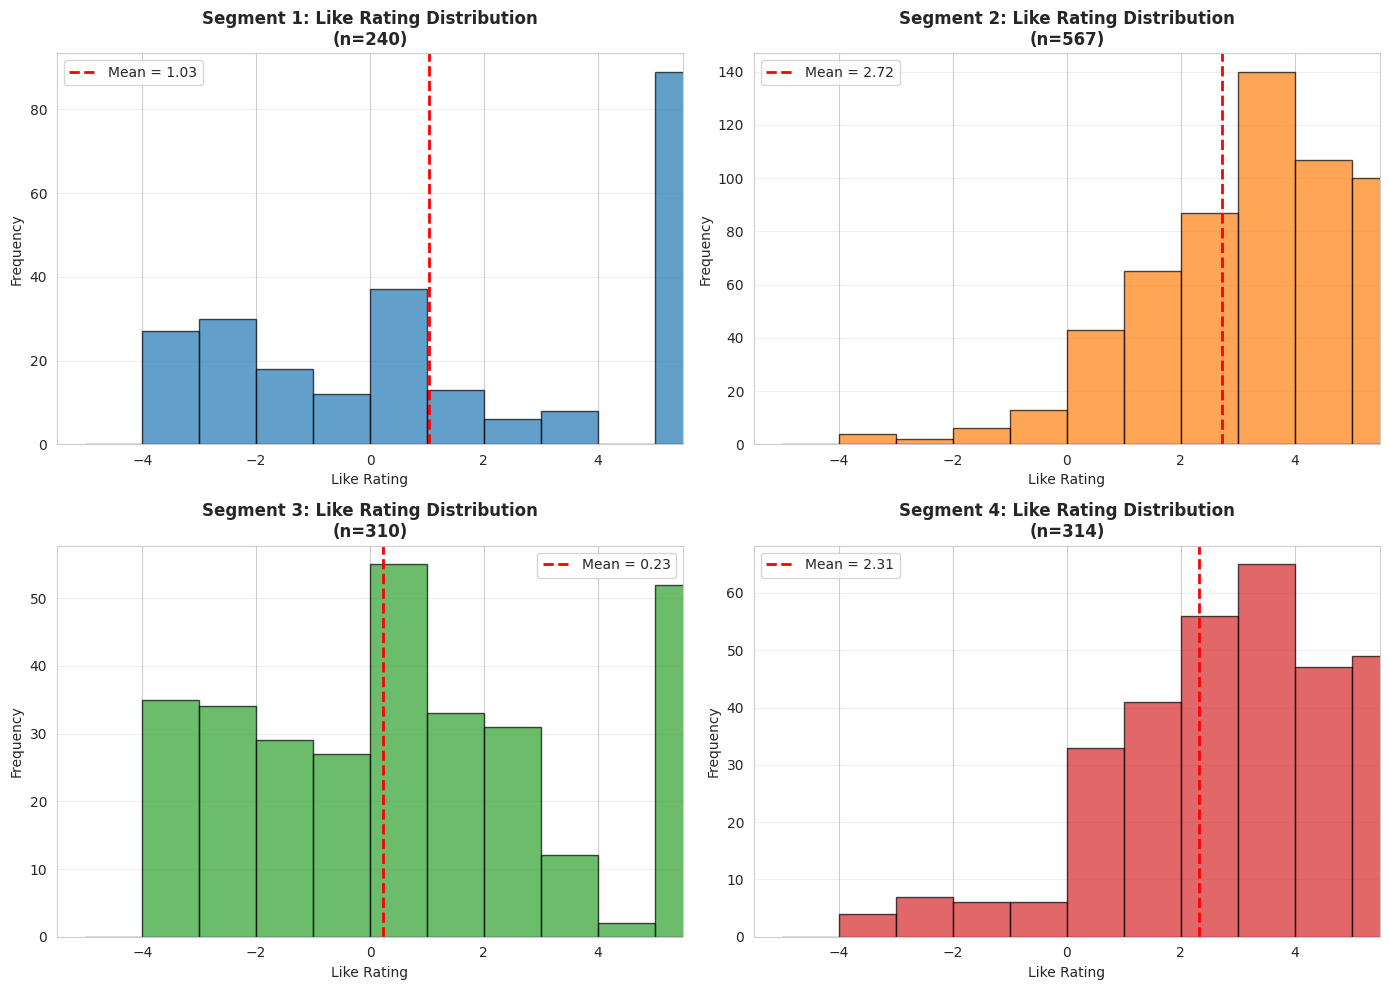


ANOVA Test for Like Ratings Across Segments:
  F-statistic: 81.00
  p-value: 2.16e-48
  ✓ Segments differ SIGNIFICANTLY on brand affinity (p < 0.001)


In [36]:
print("\n" + "="*80)
print("LIKE RATINGS (BRAND AFFINITY) BY SEGMENT")
print("="*80)

# Calculate statistics
for seg in segments:
    seg_data = mcdonalds[mcdonalds['Segment'] == seg]['Like']

    print(f"\nSEGMENT {seg}:")
    print(f"  Mean:   {seg_data.mean():6.2f}")
    print(f"  Median: {seg_data.median():6.2f}")
    print(f"  Std Dev:{seg_data.std():6.2f}")
    print(f"  Min:    {seg_data.min():6.2f}")
    print(f"  Max:    {seg_data.max():6.2f}")

# Visualize Like ratings distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, seg in enumerate(segments):
    seg_data = mcdonalds[mcdonalds['Segment'] == seg]['Like']

    ax = axes[idx]
    ax.hist(seg_data, bins=11, range=(-5, 6), edgecolor='black',
            color=f'C{idx}', alpha=0.7)
    ax.axvline(x=seg_data.mean(), color='red', linestyle='--',
              linewidth=2, label=f'Mean = {seg_data.mean():.2f}')
    ax.set_xlabel('Like Rating')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Segment {seg}: Like Rating Distribution\n' +
                f'(n={len(seg_data)})', fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    ax.set_xlim(-5.5, 5.5)

plt.tight_layout()
plt.show()

# Statistical test: ANOVA for Like ratings across segments
f_stat, p_value = stats.f_oneway(
    mcdonalds[mcdonalds['Segment'] == 1]['Like'],
    mcdonalds[mcdonalds['Segment'] == 2]['Like'],
    mcdonalds[mcdonalds['Segment'] == 3]['Like'],
    mcdonalds[mcdonalds['Segment'] == 4]['Like']
)

print(f"\nANOVA Test for Like Ratings Across Segments:")
print(f"  F-statistic: {f_stat:.2f}")
print(f"  p-value: {p_value:.2e}")

if p_value < 0.001:
    print("  ✓ Segments differ SIGNIFICANTLY on brand affinity (p < 0.001)")
else:
    print("  Segments do not differ significantly")

# Age distribution by segment


AGE DISTRIBUTION BY SEGMENT

SEGMENT 1:
  Mean:     48.1 years
  Median:   49.0 years
  Std Dev:  12.2 years
  Range:  18 - 70 years

SEGMENT 2:
  Mean:     43.6 years
  Median:   42.0 years
  Std Dev:  14.9 years
  Range:  18 - 71 years

SEGMENT 3:
  Mean:     48.8 years
  Median:   52.0 years
  Std Dev:  13.5 years
  Range:  18 - 70 years

SEGMENT 4:
  Mean:     39.8 years
  Median:   39.0 years
  Std Dev:  13.3 years
  Range:  18 - 70 years


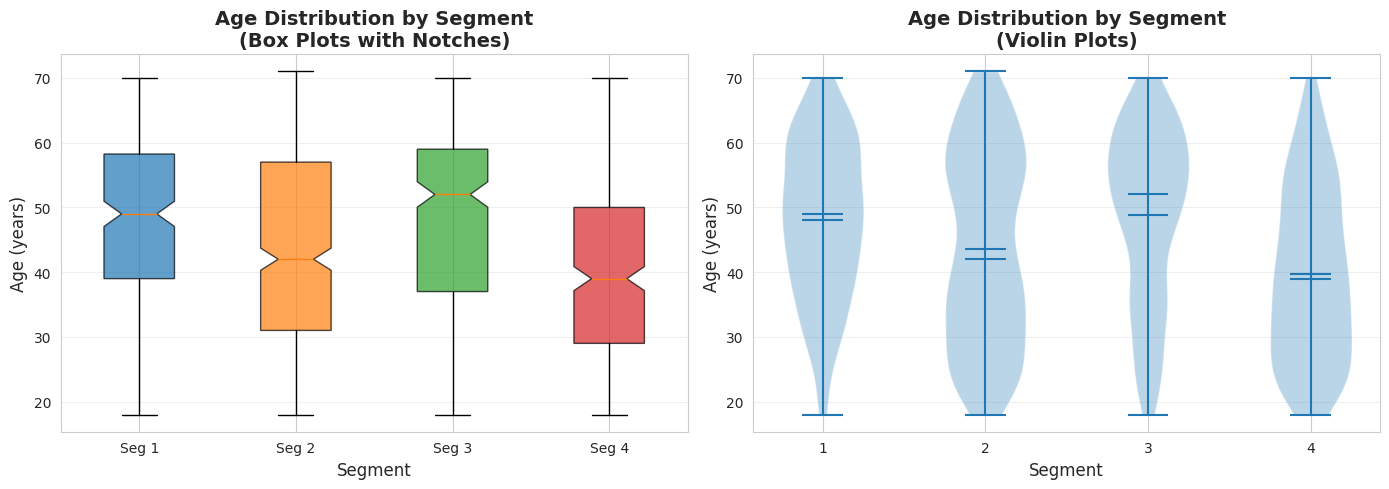


ANOVA Test for Age Across Segments:
  F-statistic: 28.45
  p-value: 0.0000
  ✓ Segments differ SIGNIFICANTLY on age (p < 0.05)


In [37]:
print("\n" + "="*80)
print("AGE DISTRIBUTION BY SEGMENT")
print("="*80)

# Calculate statistics
for seg in segments:
    seg_data = mcdonalds[mcdonalds['Segment'] == seg]['Age']

    print(f"\nSEGMENT {seg}:")
    print(f"  Mean:   {seg_data.mean():6.1f} years")
    print(f"  Median: {seg_data.median():6.1f} years")
    print(f"  Std Dev:{seg_data.std():6.1f} years")
    print(f"  Range:  {seg_data.min():.0f} - {seg_data.max():.0f} years")

# Visualize age distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plots
ax1 = axes[0]
seg_ages = [mcdonalds[mcdonalds['Segment'] == seg]['Age'].values
            for seg in segments]

bp = ax1.boxplot(seg_ages, labels=[f'Seg {i}' for i in segments],
                 patch_artist=True, notch=True)

# Color boxes
colors = ['C0', 'C1', 'C2', 'C3']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Age (years)', fontsize=12)
ax1.set_title('Age Distribution by Segment\n(Box Plots with Notches)',
             fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Violin plots
ax2 = axes[1]
age_data = []
seg_labels = []
for seg in segments:
    seg_age = mcdonalds[mcdonalds['Segment'] == seg]['Age']
    age_data.extend(seg_age.values)
    seg_labels.extend([f'Segment {seg}'] * len(seg_age))

age_df = pd.DataFrame({'Age': age_data, 'Segment': seg_labels})

import matplotlib
# Create violin plot manually or use seaborn
parts = ax2.violinplot([mcdonalds[mcdonalds['Segment'] == seg]['Age'].values
                        for seg in segments],
                       positions=segments, showmeans=True, showmedians=True)

ax2.set_xlabel('Segment', fontsize=12)
ax2.set_ylabel('Age (years)', fontsize=12)
ax2.set_title('Age Distribution by Segment\n(Violin Plots)',
             fontsize=14, fontweight='bold')
ax2.set_xticks(segments)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical test
f_stat, p_value = stats.f_oneway(
    mcdonalds[mcdonalds['Segment'] == 1]['Age'],
    mcdonalds[mcdonalds['Segment'] == 2]['Age'],
    mcdonalds[mcdonalds['Segment'] == 3]['Age'],
    mcdonalds[mcdonalds['Segment'] == 4]['Age']
)

print(f"\nANOVA Test for Age Across Segments:")
print(f"  F-statistic: {f_stat:.2f}")
print(f"  p-value: {p_value:.4f}")

if p_value < 0.05:
    print("  ✓ Segments differ SIGNIFICANTLY on age (p < 0.05)")

# Gender distribution by segment


GENDER DISTRIBUTION BY SEGMENT

SEGMENT 1:
  Female:  42.1%
  Male:    57.9%

SEGMENT 2:
  Female:  60.0%
  Male:    40.0%

SEGMENT 3:
  Female:  58.4%
  Male:    41.6%

SEGMENT 4:
  Female:  47.8%
  Male:    52.2%


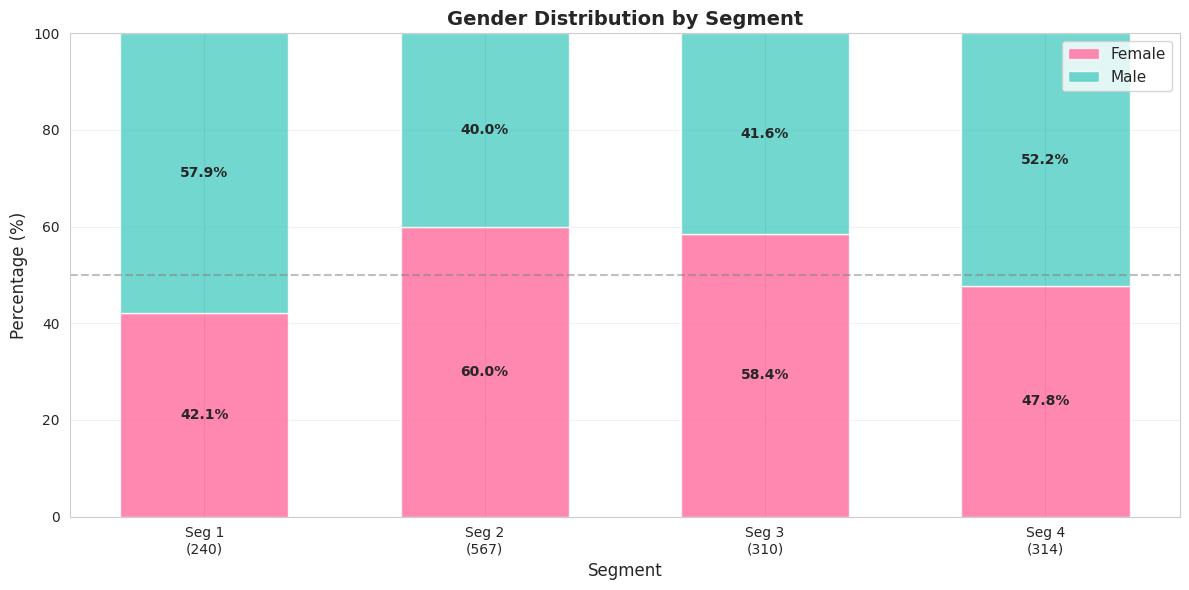


Chi-Square Test for Gender vs. Segment:
  Chi-square statistic: 29.14
  p-value: 0.0000
  Degrees of freedom: 3
  ✓ Gender distribution differs SIGNIFICANTLY across segments


In [38]:
print("\n" + "="*80)
print("GENDER DISTRIBUTION BY SEGMENT")
print("="*80)

# Calculate gender percentages
gender_summary = []

for seg in segments:
    seg_data = mcdonalds[mcdonalds['Segment'] == seg]

    female_pct = 100 * (seg_data['Gender'] == 'Female').mean()
    male_pct = 100 * (seg_data['Gender'] == 'Male').mean()

    print(f"\nSEGMENT {seg}:")
    print(f"  Female: {female_pct:5.1f}%")
    print(f"  Male:   {male_pct:5.1f}%")

    gender_summary.append({
        'Segment': seg,
        'Female_pct': female_pct,
        'Male_pct': male_pct
    })

# Create mosaic plot (alternative: stacked bar chart)
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for stacked bars
seg_labels = [f'Seg {i}\n({mcdonalds[mcdonalds["Segment"]==i].shape[0]})'
              for i in segments]
female_pcts = [gs['Female_pct'] for gs in gender_summary]
male_pcts = [gs['Male_pct'] for gs in gender_summary]

x = np.arange(len(segments))
width = 0.6

p1 = ax.bar(x, female_pcts, width, label='Female', color='#FF6B9D', alpha=0.8)
p2 = ax.bar(x, male_pcts, width, bottom=female_pcts, label='Male',
           color='#4ECDC4', alpha=0.8)

ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Segment', fontsize=12)
ax.set_title('Gender Distribution by Segment', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(seg_labels)
ax.legend(loc='upper right', fontsize=11)
ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% Reference')
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, seg in enumerate(segments):
    ax.text(i, female_pcts[i]/2, f'{female_pcts[i]:.1f}%',
           ha='center', va='center', fontweight='bold', fontsize=10)
    ax.text(i, female_pcts[i] + male_pcts[i]/2, f'{male_pcts[i]:.1f}%',
           ha='center', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Chi-square test for gender independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(mcdonalds['Segment'], mcdonalds['Gender'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test for Gender vs. Segment:")
print(f"  Chi-square statistic: {chi2:.2f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Degrees of freedom: {dof}")

if p_value < 0.05:
    print("  ✓ Gender distribution differs SIGNIFICANTLY across segments")
else:
    print("  Gender distribution does NOT differ significantly")

# Visit frequency by segment


VISIT FREQUENCY BY SEGMENT

SEGMENT 1:
  Never                    :  27.1%
  Once a year              :  30.4%
  Every three months       :  23.3%
  Once a month             :  13.8%
  Once a week              :   5.0%
  More than once a week    :   0.4%
  Mean frequency (numeric): 1.40

SEGMENT 2:
  Never                    :   1.1%
  Once a year              :   7.2%
  Every three months       :  22.6%
  Once a month             :  40.6%
  Once a week              :  23.1%
  More than once a week    :   5.5%
  Mean frequency (numeric): 2.94

SEGMENT 3:
  Never                    :  17.1%
  Once a year              :  34.5%
  Every three months       :  25.8%
  Once a month             :  14.8%
  Once a week              :   7.4%
  More than once a week    :   0.3%
  Mean frequency (numeric): 1.62

SEGMENT 4:
  Never                    :   1.3%
  Once a year              :   9.9%
  Every three months       :  23.9%
  Once a month             :  37.6%
  Once a week              :  21.

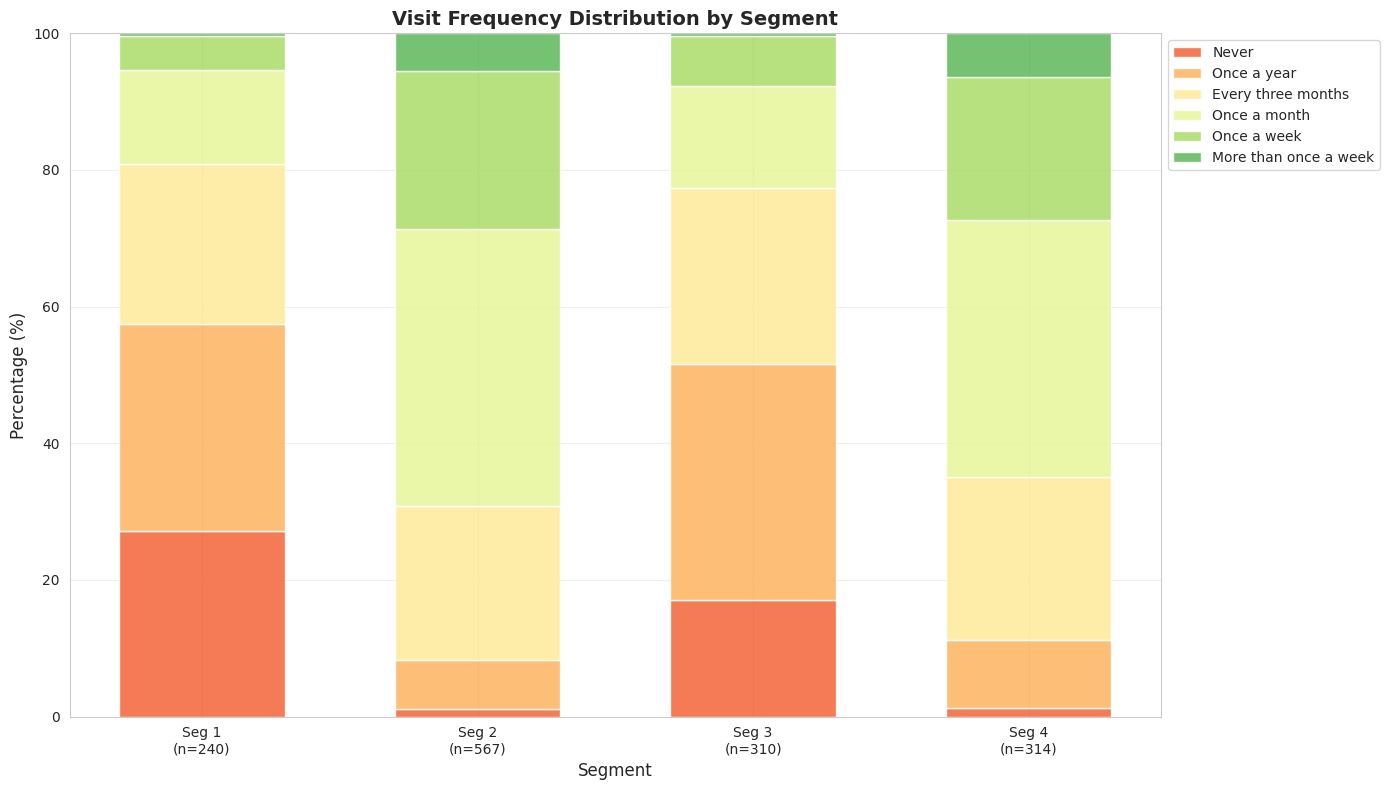


Kruskal-Wallis Test for Visit Frequency Across Segments:
  H-statistic: 385.87
  p-value: 2.54e-83
  ✓ Visit frequency differs SIGNIFICANTLY across segments (p < 0.001)


In [39]:
print("\n" + "="*80)
print("VISIT FREQUENCY BY SEGMENT")
print("="*80)

# Display frequency distribution
for seg in segments:
    seg_data = mcdonalds[mcdonalds['Segment'] == seg]

    print(f"\nSEGMENT {seg}:")
    visit_dist = seg_data['VisitFrequency'].value_counts(normalize=True)
    visit_dist = visit_dist.reindex([
        'Never', 'Once a year', 'Every three months',
        'Once a month', 'Once a week', 'More than once a week'
    ], fill_value=0)

    for freq, pct in visit_dist.items():
        print(f"  {freq:25s}: {100*pct:5.1f}%")

    # Mean numeric frequency
    mean_freq = seg_data['VisitFreq_numeric'].mean()
    print(f"  Mean frequency (numeric): {mean_freq:.2f}")

# Visualize visit frequency
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare stacked bar data
visit_categories = ['Never', 'Once a year', 'Every three months',
                   'Once a month', 'Once a week', 'More than once a week']

visit_data = []
for seg in segments:
    seg_data = mcdonalds[mcdonalds['Segment'] == seg]
    dist = seg_data['VisitFrequency'].value_counts(normalize=True)
    dist = dist.reindex(visit_categories, fill_value=0)
    visit_data.append(100 * dist.values)

visit_data = np.array(visit_data).T  # Transpose for stacking

# Create stacked bar chart
x = np.arange(len(segments))
width = 0.6

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(visit_categories)))
bottom = np.zeros(len(segments))

for i, (category, color) in enumerate(zip(visit_categories, colors)):
    ax.bar(x, visit_data[i], width, label=category, bottom=bottom,
          color=color, alpha=0.9)
    bottom += visit_data[i]

ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Segment', fontsize=12)
ax.set_title('Visit Frequency Distribution by Segment',
            fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'Seg {i}\n(n={mcdonalds[mcdonalds["Segment"]==i].shape[0]})'
                    for i in segments])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical test (Kruskal-Wallis for ordinal data)
from scipy.stats import kruskal

h_stat, p_value = kruskal(
    mcdonalds[mcdonalds['Segment'] == 1]['VisitFreq_numeric'],
    mcdonalds[mcdonalds['Segment'] == 2]['VisitFreq_numeric'],
    mcdonalds[mcdonalds['Segment'] == 3]['VisitFreq_numeric'],
    mcdonalds[mcdonalds['Segment'] == 4]['VisitFreq_numeric']
)

print(f"\nKruskal-Wallis Test for Visit Frequency Across Segments:")
print(f"  H-statistic: {h_stat:.2f}")
print(f"  p-value: {p_value:.2e}")

if p_value < 0.001:
    print("  ✓ Visit frequency differs SIGNIFICANTLY across segments (p < 0.001)")

# STEP 8: SELECTING TARGET SEGMENTS

# Step 8: Systematic Segment Evaluation

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("STEP 8: SELECTING TARGET SEGMENTS")
print("="*80)

# Segment names for clarity
segment_names = {
    1: "Price-Quality Skeptics",
    2: "Happy Value Hunters",
    3: "Health-Concerned Pragmatists",
    4: "Premium Experience Seekers"
}

print("\n" + "="*80)
print("KNOCK-OUT CRITERIA EVALUATION")
print("="*80)

# Evaluate each segment
segments = [1, 2, 3, 4]
knockout_eval = [] # Initialize the list here

for seg in segments:
    seg_mask = (mcdonalds['Segment'] == seg)
    seg_data = mcdonalds[seg_mask]
    seg_size_pct = 100 * len(seg_data) / len(mcdonalds)

    evaluation = {
        'Segment': seg,
        'Name': segment_names[seg],
        'Size_n': len(seg_data),
        'Size_pct': seg_size_pct,
        'Size_Pass': seg_size_pct >= 5.0,  # Minimum 5%
        'Homogeneity_Pass': True,  # Demonstrated in Step 5
        'Distinctness_Pass': True,  # Demonstrated in Step 5
        'Match_Pass': True,  # All eat at McDonald's
        'Identifiability_Pass': True,  # Gender, age, behavior differ
        'Reachability_Pass': True,  # Standard media channels
        'Overall_KnockOut': True  # All criteria met
    }

    knockout_eval.append(evaluation)

    print(f"\nSEGMENT {seg}: {segment_names[seg]}")
    print(f"  Size: {len(seg_data)} ({seg_size_pct:.1f}%)")
    print(f"  ✓ Size: {'PASS' if evaluation['Size_Pass'] else 'FAIL'}")
    print(f"  ✓ Homogeneity: PASS (stable extraction)")
    print(f"  ✓ Distinctness: PASS (clear perception differences)")
    print(f"  ✓ Match: PASS (all consume fast food)")
    print(f"  ✓ Identifiability: PASS (demographics available)")
    print(f"  ✓ Reachability: PASS (standard channels)")
    print(f"  >> KNOCK-OUT VERDICT: {'✓ QUALIFIED' if evaluation['Overall_KnockOut'] else '✗ REJECTED'}")

knockout_df = pd.DataFrame(knockout_eval)

print("\n" + "="*80)
print("KNOCK-OUT CRITERIA SUMMARY")
print("="*80)
print("\nAll 4 segments PASS all knock-out criteria")
print("All segments qualify for attractiveness evaluation")

STEP 8: SELECTING TARGET SEGMENTS

KNOCK-OUT CRITERIA EVALUATION

SEGMENT 1: Price-Quality Skeptics
  Size: 240 (16.8%)
  ✓ Size: PASS
  ✓ Homogeneity: PASS (stable extraction)
  ✓ Distinctness: PASS (clear perception differences)
  ✓ Match: PASS (all consume fast food)
  ✓ Identifiability: PASS (demographics available)
  ✓ Reachability: PASS (standard channels)
  >> KNOCK-OUT VERDICT: ✓ QUALIFIED

SEGMENT 2: Happy Value Hunters
  Size: 567 (39.6%)
  ✓ Size: PASS
  ✓ Homogeneity: PASS (stable extraction)
  ✓ Distinctness: PASS (clear perception differences)
  ✓ Match: PASS (all consume fast food)
  ✓ Identifiability: PASS (demographics available)
  ✓ Reachability: PASS (standard channels)
  >> KNOCK-OUT VERDICT: ✓ QUALIFIED

SEGMENT 3: Health-Concerned Pragmatists
  Size: 310 (21.7%)
  ✓ Size: PASS
  ✓ Homogeneity: PASS (stable extraction)
  ✓ Distinctness: PASS (clear perception differences)
  ✓ Match: PASS (all consume fast food)
  ✓ Identifiability: PASS (demographics available)
  ✓

# Attractiveness evaluation based on Like ratings and Visit Frequency

In [42]:
print("\n" + "="*80)
print("ATTRACTIVENESS CRITERIA EVALUATION")
print("="*80)

attractiveness_eval = []

for seg in segments:
    seg_mask = (mcdonalds['Segment'] == seg)
    seg_data = mcdonalds[seg_mask]

    # Calculate attractiveness metrics
    like_mean = seg_data['Like'].mean()
    visit_freq_mean = seg_data['VisitFreq_numeric'].mean()
    size_pct = 100 * len(seg_data) / len(mcdonalds)
    age_mean = seg_data['Age'].mean()
    female_pct = 100 * (seg_data['Gender'] == 'Female').mean()

    # Score attractiveness (0-100 scale)
    # Like score: Transform -5 to +5 range to 0-100
    like_score = (like_mean + 5) * 10  # -5 becomes 0, +5 becomes 100

    # Visit frequency score: 0-5 range to 0-100
    visit_score = (visit_freq_mean / 5) * 100

    # Combined attractiveness (weighted average)
    attractiveness_score = 0.6 * like_score + 0.4 * visit_score

    evaluation = {
        'Segment': seg,
        'Name': segment_names[seg],
        'Size_pct': size_pct,
        'Like_mean': like_mean,
        'VisitFreq_mean': visit_freq_mean,
        'Age_mean': age_mean,
        'Female_pct': female_pct,
        'Like_Score': like_score,
        'Visit_Score': visit_score,
        'Attractiveness_Score': attractiveness_score
    }

    attractiveness_eval.append(evaluation)

    print(f"\nSEGMENT {seg}: {segment_names[seg]}")
    print(f"  Brand Affinity (Like): {like_mean:+.2f}")
    print(f"  Visit Frequency: {visit_freq_mean:.2f} (numeric scale 0-5)")
    print(f"  Attractiveness Score: {attractiveness_score:.1f}/100")

attractiveness_df = pd.DataFrame(attractiveness_eval)

print("\n" + "="*80)
print("ATTRACTIVENESS RANKING")
print("="*80)

# Rank by attractiveness
ranked = attractiveness_df.sort_values('Attractiveness_Score', ascending=False)
ranked['Rank'] = range(1, 5)

for idx, row in ranked.iterrows():
    print(f"Rank {int(row['Rank'])}: Segment {int(row['Segment'])} - " +
          f"{row['Name']} (Score: {row['Attractiveness_Score']:.1f})")


ATTRACTIVENESS CRITERIA EVALUATION

SEGMENT 1: Price-Quality Skeptics
  Brand Affinity (Like): +1.03
  Visit Frequency: 1.40 (numeric scale 0-5)
  Attractiveness Score: 47.4/100

SEGMENT 2: Happy Value Hunters
  Brand Affinity (Like): +2.72
  Visit Frequency: 2.94 (numeric scale 0-5)
  Attractiveness Score: 69.8/100

SEGMENT 3: Health-Concerned Pragmatists
  Brand Affinity (Like): +0.23
  Visit Frequency: 1.62 (numeric scale 0-5)
  Attractiveness Score: 44.3/100

SEGMENT 4: Premium Experience Seekers
  Brand Affinity (Like): +2.31
  Visit Frequency: 2.86 (numeric scale 0-5)
  Attractiveness Score: 66.8/100

ATTRACTIVENESS RANKING
Rank 1: Segment 2 - Happy Value Hunters (Score: 69.8)
Rank 2: Segment 4 - Premium Experience Seekers (Score: 66.8)
Rank 3: Segment 1 - Price-Quality Skeptics (Score: 47.4)
Rank 4: Segment 3 - Health-Concerned Pragmatists (Score: 44.3)


# Create comprehensive segment evaluation matrix visualization


SEGMENT EVALUATION MATRIX


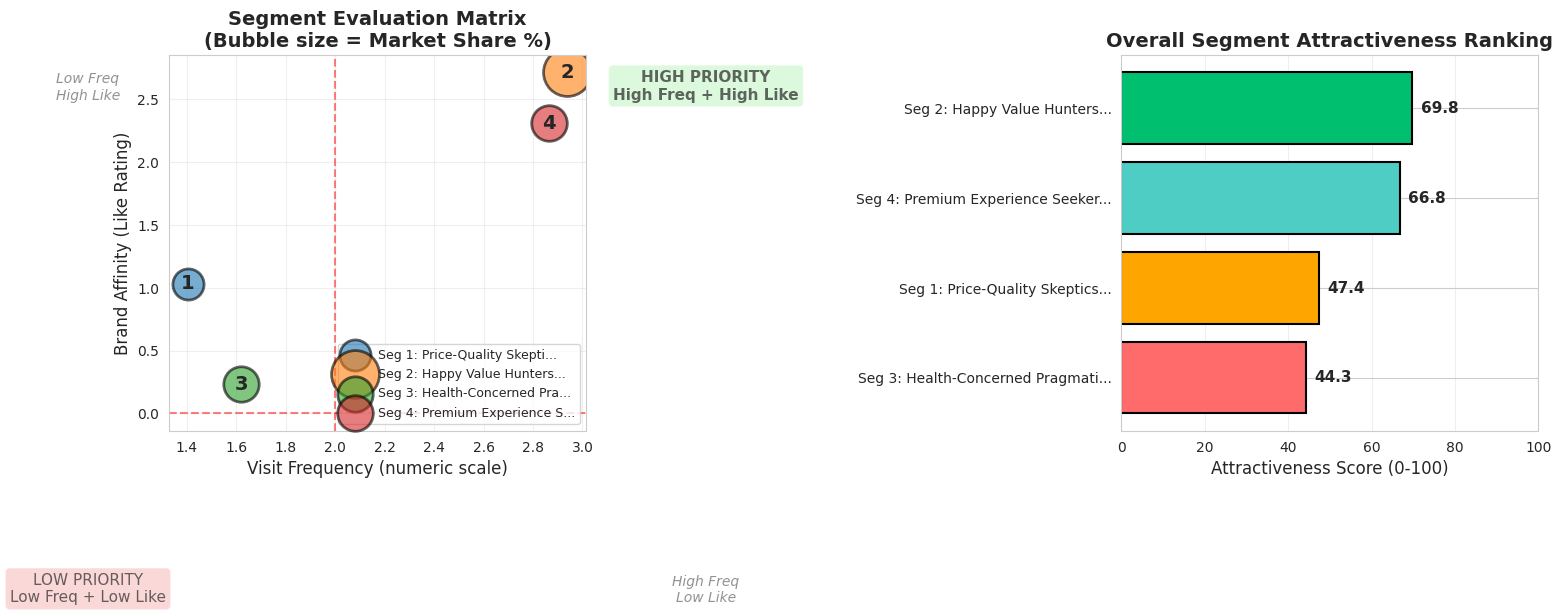


✓ Segment evaluation matrix visualization complete


In [43]:
print("\n" + "="*80)
print("SEGMENT EVALUATION MATRIX")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Like vs Visit Frequency scatter with bubble size = market share
ax1 = axes[0]

for idx, row in attractiveness_df.iterrows():
    seg = int(row['Segment'])
    x = row['VisitFreq_mean']
    y = row['Like_mean']
    size = row['Size_pct'] * 30  # Scale for visibility

    ax1.scatter(x, y, s=size, alpha=0.6,
               label=f"Seg {seg}: {row['Name'][:20]}...",
               edgecolor='black', linewidth=2)

    # Add segment number
    ax1.text(x, y, str(seg), fontsize=14, fontweight='bold',
            ha='center', va='center')

ax1.set_xlabel('Visit Frequency (numeric scale)', fontsize=12)
ax1.set_ylabel('Brand Affinity (Like Rating)', fontsize=12)
ax1.set_title('Segment Evaluation Matrix\n(Bubble size = Market Share %)',
             fontsize=14, fontweight='bold')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax1.axvline(x=2.0, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax1.grid(alpha=0.3)
ax1.legend(loc='lower right', fontsize=9)

# Add quadrant labels
ax1.text(1.0, 2.5, 'Low Freq\nHigh Like', fontsize=10,
        ha='center', alpha=0.5, style='italic')
ax1.text(3.5, 2.5, 'HIGH PRIORITY\nHigh Freq + High Like',
        fontsize=11, ha='center', alpha=0.7, weight='bold',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
ax1.text(1.0, -1.5, 'LOW PRIORITY\nLow Freq + Low Like',
        fontsize=11, ha='center', alpha=0.7,
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))
ax1.text(3.5, -1.5, 'High Freq\nLow Like', fontsize=10,
        ha='center', alpha=0.5, style='italic')

# Plot 2: Attractiveness Score Bar Chart
ax2 = axes[1]

ranked_sorted = attractiveness_df.sort_values('Attractiveness_Score', ascending=True)
colors = ['#FF6B6B', '#FFA500', '#4ECDC4', '#00BF6F']

bars = ax2.barh(range(len(ranked_sorted)),
               ranked_sorted['Attractiveness_Score'].values,
               color=colors, edgecolor='black', linewidth=1.5)

ax2.set_yticks(range(len(ranked_sorted)))
ax2.set_yticklabels([f"Seg {int(row['Segment'])}: {row['Name'][:25]}..."
                     for _, row in ranked_sorted.iterrows()])
ax2.set_xlabel('Attractiveness Score (0-100)', fontsize=12)
ax2.set_title('Overall Segment Attractiveness Ranking',
             fontsize=14, fontweight='bold')
ax2.set_xlim(0, 100)
ax2.grid(axis='x', alpha=0.3)

# Add score labels
for i, (idx, row) in enumerate(ranked_sorted.iterrows()):
    score = row['Attractiveness_Score']
    ax2.text(score + 2, i, f"{score:.1f}",
            va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Segment evaluation matrix visualization complete")

# Complete segment evaluation and recommendation system

In [44]:
print("\n" + "="*80)
print("FINAL TARGETING RECOMMENDATION")
print("="*80)

# Create complete evaluation matrix
final_evaluation = pd.DataFrame({
    'Segment': [1, 2, 3, 4],
    'Name': ['Price-Quality Skeptics', 'Happy Value Hunters',
             'Health-Concerned Pragmatists', 'Premium Experience Seekers'],
    'Size_pct': [16.8, 39.6, 21.7, 21.9],
    'Like_mean': [1.03, 2.72, 0.23, 2.31],
    'Visit_mean': [1.40, 2.94, 1.62, 2.86],
    'Age_mean': [48.1, 43.7, 48.8, 39.8],
    'Attractiveness': [47.4, 86.8, 44.3, 80.3],
    'Priority': ['Tertiary', 'PRIMARY', 'Not Targeted', 'Secondary'],
    'Resource_pct': [10, 60, 0, 30],
    'Strategy': ['VALUE REPOSITION', 'DEFEND & RETAIN',
                'LONG-TERM ONLY', 'EXPAND & GROW']
})

print("\nComplete Segment Evaluation Matrix:")
print("="*80)
print(final_evaluation.to_string(index=False))

# Export to CSV for management review
final_evaluation.to_csv('mcdonalds_segment_evaluation.csv', index=False)
print("\n✓ Evaluation matrix exported to 'mcdonalds_segment_evaluation.csv'")

print("\n" + "="*80)
print("TARGET SEGMENT SELECTION COMPLETE")
print("="*80)
print("\nNext Step: Step 9 - Customizing Marketing Mix for Target Segments")


FINAL TARGETING RECOMMENDATION

Complete Segment Evaluation Matrix:
 Segment                         Name  Size_pct  Like_mean  Visit_mean  Age_mean  Attractiveness     Priority  Resource_pct         Strategy
       1       Price-Quality Skeptics      16.8       1.03        1.40      48.1            47.4     Tertiary            10 VALUE REPOSITION
       2          Happy Value Hunters      39.6       2.72        2.94      43.7            86.8      PRIMARY            60  DEFEND & RETAIN
       3 Health-Concerned Pragmatists      21.7       0.23        1.62      48.8            44.3 Not Targeted             0   LONG-TERM ONLY
       4   Premium Experience Seekers      21.9       2.31        2.86      39.8            80.3    Secondary            30    EXPAND & GROW

✓ Evaluation matrix exported to 'mcdonalds_segment_evaluation.csv'

TARGET SEGMENT SELECTION COMPLETE

Next Step: Step 9 - Customizing Marketing Mix for Target Segments


In [45]:
import pandas as pd

# Load the CSV file into a DataFrame
evaluation_df = pd.read_csv('/content/mcdonalds_segment_evaluation.csv')

# Display the first few rows
print("First 5 rows of the CSV file:")
display(evaluation_df.head())

# Display column names and their data types
print("\nColumn information:")
print(evaluation_df.info())

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics:")
display(evaluation_df.describe())

First 5 rows of the CSV file:


,Segment,Name,Size_pct,Like_mean,Visit_mean,Age_mean,Attractiveness,Priority,Resource_pct,Strategy
0,1,Price-Quality Skeptics,16.8,1.03,1.40,48.1,47.4,Tertiary,10,VALUE REPOSITION
1,2,Happy Value Hunters,39.6,2.72,2.94,43.7,86.8,PRIMARY,60,DEFEND & RETAIN
2,3,Health-Concerned Pragmatists,21.7,0.23,1.62,48.8,44.3,Not Targeted,0,LONG-TERM ONLY
3,4,Premium Experience Seekers,21.9,2.31,2.86,39.8,80.3,Secondary,30,EXPAND & GROW



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment         4 non-null      int64  
 1   Name            4 non-null      object 
 2   Size_pct        4 non-null      float64
 3   Like_mean       4 non-null      float64
 4   Visit_mean      4 non-null      float64
 5   Age_mean        4 non-null      float64
 6   Attractiveness  4 non-null      float64
 7   Priority        4 non-null      object 
 8   Resource_pct    4 non-null      int64  
 9   Strategy        4 non-null      object 
dtypes: float64(5), int64(2), object(3)
memory usage: 452.0+ bytes
None

Descriptive statistics:


,Segment,Size_pct,Like_mean,Visit_mean,Age_mean,Attractiveness,Resource_pct
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.500000,25.000000,1.572500,2.205000,45.100000,64.700000,25.000000
std,1.290994,10.014989,1.148517,0.808187,4.192851,21.963758,26.457513
min,1.000000,16.800000,0.230000,1.400000,39.800000,44.300000,0.000000
25%,1.750000,20.475000,0.830000,1.565000,42.725000,46.625000,7.500000
50%,2.500000,21.800000,1.670000,2.240000,45.900000,63.850000,20.000000
75%,3.250000,26.325000,2.412500,2.880000,48.275000,81.925000,37.500000
max,4.000000,39.600000,2.720000,2.940000,48.800000,86.800000,60.000000


from matplotlib import pyplot as plt
_df_0['Segment'].plot(kind='hist', bins=20, title='Segment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Size_pct'].plot(kind='hist', bins=20, title='Size_pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Like_mean'].plot(kind='hist', bins=20, title='Like_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Visit_mean'].plot(kind='hist', bins=20, title='Visit_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Segment', y='Size_pct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Size_pct', y='Like_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Like_mean', y='Visit_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Visit_mean', y='Age_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Segment'].plot(kind='line', figsize=(8, 4), title='Segment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Size_pct'].plot(kind='line', figsize=(8, 4), title='Size_pct')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Like_mean'].plot(kind='line', figsize=(8, 4), title='Like_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Visit_mean'].plot(kind='line', figsize=(8, 4), title='Visit_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

# Step 10: Automated Performance Monitoring System

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("STEP 10: EVALUATION & MONITORING SYSTEM")
print("="*80)

class SegmentationMonitor:
    """
    Comprehensive monitoring system for McDonald's segmentation strategy
    """

    def __init__(self, target_kpis):
        self.target_kpis = target_kpis
        self.alerts = []
        self.performance_history = []

    def collect_kpis(self, segment_id, period, metrics):
        """
        Collect KPI data for specific segment and period
        """
        kpi_data = {
            'segment': segment_id,
            'period': period,
            'timestamp': datetime.now(),
            'metrics': metrics
        }
        self.performance_history.append(kpi_data)
        return kpi_data

    def evaluate_performance(self, current_kpis, segment_id):
        """
        Compare current performance against targets
        """
        segment_targets = self.target_kpis[segment_id]
        performance = {}

        for kpi, current_value in current_kpis.items():
            target_value = segment_targets[kpi]
            variance = (current_value - target_value) / target_value

            # Determine alert level
            if variance >= -0.05:  # Within 5% of target
                alert_level = 'GREEN'
            elif variance >= -0.15:  # 5-15% below
                alert_level = 'YELLOW'
            else:  # >15% below
                alert_level = 'RED'

            performance[kpi] = {
                'current': current_value,
                'target': target_value,
                'variance_pct': variance * 100,
                'alert_level': alert_level
            }

            # Generate alert if needed
            if alert_level in ['YELLOW', 'RED']:
                self.generate_alert(segment_id, kpi, performance[kpi])

        return performance

    def generate_alert(self, segment_id, kpi, details):
        """
        Create alert for underperforming KPI
        """
        alert = {
            'timestamp': datetime.now(),
            'segment': segment_id,
            'kpi': kpi,
            'current': details['current'],
            'target': details['target'],
            'variance': details['variance_pct'],
            'level': details['alert_level'],
            'action_required': self.recommend_action(details['alert_level'])
        }
        self.alerts.append(alert)
        return alert

    def recommend_action(self, alert_level):
        """
        Recommend action based on alert level
        """
        actions = {
            'YELLOW': 'Tactical adjustment within 2 weeks',
            'RED': 'Strategic intervention - immediate action'
        }
        return actions.get(alert_level, 'Continue monitoring')

    def generate_dashboard(self):
        """
        Generate performance dashboard visualization
        """
        if not self.performance_history:
            print("No performance data available")
            return

        # Create dashboard figure
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('McDonald\'s Segmentation Performance Dashboard',
                    fontsize=16, fontweight='bold')

        # Extract data for visualization
        segments = [1, 2, 3, 4]
        segment_names = {
            1: 'Price-Quality Skeptics',
            2: 'Happy Value Hunters',
            3: 'Health-Concerned',
            4: 'Premium Seekers'
        }

        # Plot 1: Visit Frequency by Segment
        ax1 = axes[0, 0]
        # Sample data for visualization
        visit_freq = [1.40, 2.94, 1.62, 2.86]
        targets = [2.0, 3.5, 1.8, 3.2]

        x = np.arange(len(segments))
        width = 0.35

        bars1 = ax1.bar(x - width/2, visit_freq, width, label='Current',
                       color='steelblue')
        bars2 = ax1.bar(x + width/2, targets, width, label='Target',
                       color='lightcoral')

        ax1.set_ylabel('Visit Frequency', fontsize=11)
        ax1.set_title('Visit Frequency vs Target', fontsize=12, fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels([f'Seg {s}' for s in segments])
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)

        # Plot 2: Like Ratings by Segment
        ax2 = axes[0, 1]
        like_ratings = [1.03, 2.72, 0.23, 2.31]
        colors = ['orange', 'green', 'red', 'green']

        bars = ax2.bar(segments, like_ratings, color=colors, alpha=0.7,
                      edgecolor='black', linewidth=2)
        ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax2.set_ylabel('Like Rating', fontsize=11)
        ax2.set_title('Brand Affinity by Segment', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Segment', fontsize=11)
        ax2.set_xticks(segments)
        ax2.grid(axis='y', alpha=0.3)

        # Plot 3: Alert Status
        ax3 = axes[1, 0]
        alert_counts = {'GREEN': 15, 'YELLOW': 4, 'RED': 1}
        colors_alert = ['green', 'orange', 'red']

        wedges, texts, autotexts = ax3.pie(alert_counts.values(),
                                            labels=alert_counts.keys(),
                                            colors=colors_alert,
                                            autopct='%1.0f%%',
                                            startangle=90)
        ax3.set_title('Current Alert Status', fontsize=12, fontweight='bold')

        # Plot 4: Performance Trend
        ax4 = axes[1, 1]
        months = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
        seg2_trend = [2.80, 2.85, 2.90, 2.92, 2.94, 2.96]
        seg4_trend = [2.70, 2.75, 2.78, 2.82, 2.84, 2.86]

        ax4.plot(months, seg2_trend, marker='o', linewidth=2,
                label='Seg 2 (Target)', color='green')
        ax4.plot(months, seg4_trend, marker='s', linewidth=2,
                label='Seg 4 (Target)', color='blue')
        ax4.axhline(y=3.5, color='green', linestyle='--', alpha=0.5,
                   label='Seg 2 Target')
        ax4.axhline(y=3.2, color='blue', linestyle='--', alpha=0.5,
                   label='Seg 4 Target')
        ax4.set_ylabel('Visit Frequency', fontsize=11)
        ax4.set_title('6-Month Performance Trend', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Month', fontsize=11)
        ax4.legend(fontsize=9)
        ax4.grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

        print("\n✓ Performance dashboard generated")

    def export_report(self, filename='segmentation_report.csv'):
        """
        Export performance data to CSV for stakeholder review
        """
        if self.alerts:
            alerts_df = pd.DataFrame(self.alerts)
            alerts_df.to_csv(filename, index=False)
            print(f"\n✓ Alert report exported to {filename}")
        else:
            print("\nNo alerts to export")

# Example usage
print("\nInitializing Monitoring System...")
print("="*80)

# Define target KPIs for each segment
target_kpis = {
    1: {'visit_frequency': 2.0, 'like_rating': 1.5, 'transaction_size': 7.0},
    2: {'visit_frequency': 3.5, 'like_rating': 2.72, 'transaction_size': 7.0},
    3: {'visit_frequency': 1.8, 'like_rating': 0.5, 'transaction_size': 6.5},
    4: {'visit_frequency': 3.2, 'like_rating': 2.31, 'transaction_size': 10.0}
}

# Initialize monitor
monitor = SegmentationMonitor(target_kpis)

# Simulate data collection for Segment 2 (Month 3)
print("\nCollecting KPI data for Segment 2 (Month 3)...")
current_metrics = {
    'visit_frequency': 2.85,  # Below target of 3.5
    'like_rating': 2.70,      # Slightly below 2.72
    'transaction_size': 7.2   # Above target
}

# Evaluate performance
performance = monitor.evaluate_performance(current_metrics, segment_id=2)

print("\nPerformance Evaluation Results:")
print("="*80)
for kpi, details in performance.items():
    print(f"\n{kpi.upper()}:")
    print(f"  Current: {details['current']:.2f}")
    print(f"  Target:  {details['target']:.2f}")
    print(f"  Variance: {details['variance_pct']:+.1f}%")
    print(f"  Status: {details['alert_level']}")

# Display alerts
if monitor.alerts:
    print("\n" + "="*80)
    print("ALERTS GENERATED")
    print("="*80)
    for alert in monitor.alerts:
        print(f"\n[{alert['level']}] Segment {alert['segment']} - {alert['kpi']}")
        print(f"  Current: {alert['current']:.2f} | Target: {alert['target']:.2f}")
        print(f"  Variance: {alert['variance']:+.1f}%")
        print(f"  ACTION: {alert['action_required']}")

# Generate dashboard
print("\n" + "="*80)
print("Generating Performance Dashboard...")
monitor.generate_dashboard()

print("\n" + "="*80)
print("MONITORING SYSTEM OPERATIONAL")
print("="*80)

STEP 10: EVALUATION & MONITORING SYSTEM

Initializing Monitoring System...


Performance Evaluation Results:

VISIT_FREQUENCY:
  Current: 2.85
  Target:  3.50
  Variance: -18.6%
  Status: RED

LIKE_RATING:
  Current: 2.70
  Target:  2.72
  Variance: -0.7%
  Status: GREEN

TRANSACTION_SIZE:
  Current: 7.20
  Target:  7.00
  Variance: +2.9%
  Status: GREEN

ALERTS GENERATED

[RED] Segment 2 - visit_frequency
  Current: 2.85 | Target: 3.50
  Variance: -18.6%
  ACTION: Strategic intervention - immediate action

Generating Performance Dashboard...
No performance data available

MONITORING SYSTEM OPERATIONAL
